In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, JLD2 
using CairoMakie
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
function output(idx, parameter, u0)
    println("index: $idx; αE: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [3]:
u0_start = SA[0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449];

In [4]:
tstep = 0.001;
time_transient = 3000; # transient time
time_lse = 15000; # time calculating LSE
integ_set = (alg = Vern9(), adaptive = true, abstol = 1e-14, reltol = 1e-14); # integrator setting
param = TM6_glial_ECM_get_params(); # parameters of model
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [5]:
len = 250;
αE_range = range(0.067, 5.0, length = len);

In [6]:
Λs =  zeros(length(αE_range), 6);
u0s = zeros(length(αE_range), 6);

In [7]:
namefirst = "diagram ";
namelast = " alphaE $(len) autojac"
format = ".jld2";

namefile_LSE = namefirst * "LSE" * namelast * format;
namefile_u0s = namefirst * "u0" * namelast * format;

In [8]:
for (index, αE) in enumerate(αE_range)

    if index == 1
        global u0 = u0_start
    end

    output(index, αE, u0)

    param[6] = αE
    ds = CoupledODEs(TM6_glial_ECM,  u0, param, diffeq = integ_set)

    tr, _ = trajectory(ds, time_transient, Δt = tstep)
    u0 = tr[end]; ds = CoupledODEs(TM6_glial_ECM,  u0, param, diffeq = integ_set)
    println("calc LSE");flush(stdout)
    Λ = lyapunovspectrum(ds, time_lse)
    Λs[index, :] = Λ
    u0s[index, :] = u0
    
    jldsave(namefile_LSE; Λs);
    jldsave(namefile_u0s; u0s);
    
    output(Λs[index, :], u0s[index, :])
    separate()
    
end

index: 1; αE: 0.067


u0: [0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449]


calc LSE


Λ: [0.00013464888529284873, -0.001104701206199438, -0.007898195888042992, -0.5555557035977557, -0.8492552050990817, -8.225551241303387]


last point: [1.036577992518918, 0.7836028935114139, 0.7217160676699496, 0.06434851658138778, 0.15146469662899747, 0.0009338152380586541]


----------------


index: 2; αE: 0.08681124497991968


u0: [1.036577992518918, 0.7836028935114139, 0.7217160676699496, 0.06434851658138778, 0.15146469662899747, 0.0009338152380586541]


calc LSE


Λ: [1.7443856140851178e-5, -0.0044685686283786235, -0.004730103717814456, -0.5555558261873419, -0.8893468559999786, -8.232883596597295]


last point: [4.586097632661702, 0.43869326393698554, 0.7922321024329363, 0.06875171792963426, 0.12853438449372256, 0.0057827113475513925]


----------------


index: 3; αE: 0.10662248995983936


u0: [4.586097632661702, 0.43869326393698554, 0.7922321024329363, 0.06875171792963426, 0.12853438449372256, 0.0057827113475513925]


calc LSE


Λ: [6.234099061034546e-5, -0.004521304668650074, -0.004799668301596894, -0.5555558401366726, -0.9141144397469634, -8.23665902496714]


last point: [1.5753874715622813, 0.8413434065583691, 0.6866736501731712, 0.06747228338889204, 0.1107854599078069, 0.01016388806857496]


----------------


index: 4; αE: 0.12643373493975904


u0: [1.5753874715622813, 0.8413434065583691, 0.6866736501731712, 0.06747228338889204, 0.1107854599078069, 0.01016388806857496]


calc LSE


Λ: [0.00016099911974315508, -0.00473445548849099, -0.005055681458384167, -0.5555559359960541, -0.9456155483748016, -8.24030248073917]


last point: [1.2598128747917696, 0.823036527991429, 0.7032970677805189, 0.06320938794903096, 0.10048003293287208, 0.01470947647426602]


----------------


index: 5; αE: 0.14624497991967872


u0: [1.2598128747917696, 0.823036527991429, 0.7032970677805189, 0.06320938794903096, 0.10048003293287208, 0.01470947647426602]


calc LSE


Λ: [-1.5653180218324616e-5, -0.004994923128916958, -0.005247046522830096, -0.5555560641314281, -0.9868039014368577, -8.2432214879794]


last point: [3.3688823589302164, 0.8260478433256992, 0.6731222191472322, 0.07079968138753441, 0.09532260805627082, 0.01911572943624062]


----------------


index: 6; αE: 0.1660562248995984


u0: [3.3688823589302164, 0.8260478433256992, 0.6731222191472322, 0.07079968138753441, 0.09532260805627082, 0.01911572943624062]


calc LSE


Λ: [0.00014402417283315003, -0.005254763519955077, -0.005533844736428061, -0.5555561360837382, -1.0326652708462518, -8.24382025380637]


last point: [1.5253100352615507, 0.8374368589522443, 0.6916025962391658, 0.06333537668014388, 0.09296795345304414, 0.023131851563723504]


----------------


index: 7; αE: 0.18586746987951808


u0: [1.5253100352615507, 0.8374368589522443, 0.6916025962391658, 0.06333537668014388, 0.09296795345304414, 0.023131851563723504]


calc LSE


Λ: [2.1180761465014675e-7, -0.005508882860198948, -0.00574209070507336, -0.5555559838663402, -1.0787994800303933, -8.241554985417261]


last point: [1.1132231041662504, 0.7974428277582137, 0.718101219922359, 0.05822379260805112, 0.09182073980241305, 0.026656768818249917]


----------------


index: 8; αE: 0.20567871485943776


u0: [1.1132231041662504, 0.7974428277582137, 0.718101219922359, 0.05822379260805112, 0.09182073980241305, 0.026656768818249917]


calc LSE


Λ: [-6.107806904951903e-6, -0.005691464981695436, -0.00590878717593216, -0.5555561244942997, -1.12345893294897, -8.236575674315892]


last point: [24.31776747627437, 0.5567280298041706, 0.723715067317124, 0.06561849428614652, 0.09111403161977553, 0.029664890769748802]


----------------


index: 9; αE: 0.22548995983935743


u0: [24.31776747627437, 0.5567280298041706, 0.723715067317124, 0.06561849428614652, 0.09111403161977553, 0.029664890769748802]


calc LSE


Λ: [2.9164178833447604e-5, -0.00584903164898541, -0.006061101040990663, -0.5555561424028987, -1.166107138062938, -8.22884750724922]


last point: [3.5285989993137923, 0.8222131655032221, 0.6784906629471491, 0.06460599000306433, 0.09080883469943021, 0.03243047237085265]


----------------


index: 10; αE: 0.2453012048192771


u0: [3.5285989993137923, 0.8222131655032221, 0.6784906629471491, 0.06460599000306433, 0.09080883469943021, 0.03243047237085265]


calc LSE


Λ: [3.482641682443423e-5, -0.0059670098565923375, -0.006220395715037457, -0.5555561654391132, -1.2066879453974155, -8.218797388778317]


last point: [2.6387553373044375, 0.8316700893371959, 0.6813987637587826, 0.06228248324799424, 0.09064311535316236, 0.03491373929308877]


----------------


index: 11; αE: 0.2651124497991968


u0: [2.6387553373044375, 0.8316700893371959, 0.6813987637587826, 0.06228248324799424, 0.09064311535316236, 0.03491373929308877]


calc LSE


Λ: [4.8183130857231636e-5, -0.0061330993578437056, -0.0063279245283104045, -0.5555562882198795, -1.2452720444993721, -8.20663248474972]


last point: [1.0360430696584146, 0.7721959688372628, 0.7301787921832734, 0.0530856403318764, 0.09063945349058684, 0.0372417035821978]


----------------


index: 12; αE: 0.28492369477911644


u0: [1.0360430696584146, 0.7721959688372628, 0.7301787921832734, 0.0530856403318764, 0.09063945349058684, 0.0372417035821978]


calc LSE


Λ: [4.7859995193094176e-5, -0.00621611006064058, -0.006453998497457261, -0.5555562765034114, -1.2820522984333056, -8.192621333718964]


last point: [1.217204828983795, 0.8087228534595096, 0.7144719341477929, 0.052813955284776705, 0.09059587056075696, 0.03930892434980715]


----------------


index: 13; αE: 0.30473493975903615


u0: [1.217204828983795, 0.8087228534595096, 0.7144719341477929, 0.052813955284776705, 0.09059587056075696, 0.03930892434980715]


calc LSE


Λ: [-0.00010439901445547135, -0.006308224163916472, -0.006532351992828986, -0.5555561332886538, -1.3171720400129991, -8.176867965872765]


last point: [3.3576072257620195, 0.8219643354043347, 0.6835596308261239, 0.05902657144905205, 0.09054512663825628, 0.04118956668553967]


----------------


index: 14; αE: 0.3245461847389558


u0: [3.3576072257620195, 0.8219643354043347, 0.6835596308261239, 0.05902657144905205, 0.09054512663825628, 0.04118956668553967]


calc LSE


Λ: [-6.260513223203951e-5, -0.006480494546000832, -0.006606266628505273, -0.5555557905983798, -1.3506773596923611, -8.15944245282016]


last point: [13.726975853270673, 0.34482642783806083, 0.800824502972662, 0.055595126375634324, 0.09078337912594783, 0.04318198880816413]


----------------


index: 15; αE: 0.3443574297188755


u0: [13.726975853270673, 0.34482642783806083, 0.800824502972662, 0.055595126375634324, 0.09078337912594783, 0.04318198880816413]


calc LSE


Λ: [-7.48400275226003e-5, -0.006540202578086276, -0.006686822124608166, -0.5555563022111286, -1.3829087911703257, -8.14071402549105]


last point: [1.7457217714121174, 0.539345569489908, 0.78607272863685, 0.051578272919185916, 0.0907882341919945, 0.04484548426377809]


----------------


index: 16; αE: 0.36416867469879516


u0: [1.7457217714121174, 0.539345569489908, 0.78607272863685, 0.051578272919185916, 0.0907882341919945, 0.04484548426377809]


calc LSE


Λ: [-2.6652722857281338e-5, -0.006593485393816072, -0.0067637810340908456, -0.5555563240708705, -1.4138163447662124, -8.12065961430566]


last point: [0.9535353628073845, 0.6741729292358307, 0.7605658151716941, 0.04885162907460697, 0.09081582921630443, 0.046426698142840624]


----------------


index: 17; αE: 0.38397991967871486


u0: [0.9535353628073845, 0.6741729292358307, 0.7605658151716941, 0.04885162907460697, 0.09081582921630443, 0.046426698142840624]


calc LSE


Λ: [0.00015868787032826212, -0.0066329099980914005, -0.006874322745400575, -0.5555565351847576, -1.4435453110346401, -8.09940872841632]


last point: [1.0719541731952014, 0.7752357731205943, 0.7313532175526685, 0.04710700397056881, 0.09083988010588526, 0.04791665408214725]


----------------


index: 18; αE: 0.4037911646586345


u0: [1.0719541731952014, 0.7752357731205943, 0.7313532175526685, 0.04710700397056881, 0.09083988010588526, 0.04791665408214725]


calc LSE


Λ: [-3.818717826958502e-5, -0.006734467829929808, -0.006879293200870443, -0.555556372091644, -1.4722345457950787, -8.076982484927274]


last point: [4.209443941180783, 0.8104595416317489, 0.6885722964607552, 0.053692452034758135, 0.0908135787144347, 0.04928405157633123]


----------------


index: 19; αE: 0.4236024096385542


u0: [4.209443941180783, 0.8104595416317489, 0.6885722964607552, 0.053692452034758135, 0.0908135787144347, 0.04928405157633123]


calc LSE


Λ: [-2.7857050575734696e-5, -0.0067601370141926916, -0.007001440157062146, -0.5555562173532724, -1.4998975528090046, -8.053386050825445]


last point: [1.1314237777465512, 0.7867658472191094, 0.7273058760542722, 0.04555000259998101, 0.09097056390809971, 0.050752364058233496]


----------------


index: 20; αE: 0.4434136546184739


u0: [1.1314237777465512, 0.7867658472191094, 0.7273058760542722, 0.04555000259998101, 0.09097056390809971, 0.050752364058233496]


calc LSE


Λ: [-0.00016925446255474272, -0.00691147389629955, -0.006956056610209189, -0.5555562219127008, -1.5266785262922513, -8.028885226606237]


last point: [14.762889182707227, 0.7006509708827761, 0.7043827087789968, 0.05186579518045805, 0.09093151979185188, 0.05198139889041754]


----------------


index: 21; αE: 0.4632248995983936


u0: [14.762889182707227, 0.7006509708827761, 0.7043827087789968, 0.05186579518045805, 0.09093151979185188, 0.05198139889041754]


calc LSE


Λ: [-0.00010325913929130929, -0.00692885974665485, -0.007084151154912553, -0.5555564701123414, -1.5525712267361467, -8.003298099773279]


last point: [2.0981313582314134, 0.5138618192775415, 0.7927893976850189, 0.046230418664956516, 0.09121076073754054, 0.05345124067440029]


----------------


index: 22; αE: 0.48303614457831323


u0: [2.0981313582314134, 0.5138618192775415, 0.7927893976850189, 0.046230418664956516, 0.09121076073754054, 0.05345124067440029]


calc LSE


Λ: [-2.7296005890939843e-5, -0.007012901796828486, -0.007072019039438919, -0.5555566162879207, -1.5777349333318775, -7.976950198143911]


last point: [10.267003187198815, 0.7483827410908017, 0.6983394301786722, 0.05013839727289759, 0.09107743570460593, 0.05449225754412051]


----------------


index: 23; αE: 0.5028473895582329


u0: [10.267003187198815, 0.7483827410908017, 0.6983394301786722, 0.05013839727289759, 0.09107743570460593, 0.05449225754412051]


calc LSE


Λ: [-3.5749735829936194e-5, -0.006999398433833076, -0.0071955839567721305, -0.5555565080360904, -1.6021426956192528, -7.949508026869897]


last point: [1.629236912345474, 0.5463123081473286, 0.7884645909900175, 0.044235214620843115, 0.09134576440999025, 0.05586254692555019]


----------------


index: 24; αE: 0.5226586345381526


u0: [1.629236912345474, 0.5463123081473286, 0.7884645909900175, 0.044235214620843115, 0.09134576440999025, 0.05586254692555019]


calc LSE


Λ: [-8.262563153873093e-6, -0.007025641558460803, -0.007250412535771661, -0.5555565745818059, -1.6258735576923364, -7.921429787999685]


last point: [2.8627916438109007, 0.8203485734966591, 0.6955550756278147, 0.047237326237176185, 0.09124182457421232, 0.056847835340742885]


----------------


index: 25; αE: 0.5424698795180722


u0: [2.8627916438109007, 0.8203485734966591, 0.6955550756278147, 0.047237326237176185, 0.09124182457421232, 0.056847835340742885]


calc LSE


Λ: [-0.00018038346565737412, -0.007166577112189493, -0.007097685511022561, -0.5555562579543715, -1.649092603500523, -7.892403752551165]


last point: [28.653258950520915, 0.4767124355061279, 0.7535093849036444, 0.04658084396245403, 0.09136350764781626, 0.058004520462463474]


----------------


index: 26; αE: 0.562281124497992


u0: [28.653258950520915, 0.4767124355061279, 0.7535093849036444, 0.04658084396245403, 0.09136350764781626, 0.058004520462463474]


calc LSE


Λ: [-3.582880217547145e-5, -0.007125303035627826, -0.007347112032641209, -0.5555566927772063, -1.671443109879246, -7.862560930734647]


last point: [1.6838699084861724, 0.5411287934556657, 0.7904937229996807, 0.04198316081699254, 0.09155249436249027, 0.0591967733020825]


----------------


index: 27; αE: 0.5820923694779117


u0: [1.6838699084861724, 0.5411287934556657, 0.7904937229996807, 0.04198316081699254, 0.09155249436249027, 0.0591967733020825]


calc LSE


Λ: [-8.451410269539581e-6, -0.007235611670556048, -0.007361016819873029, -0.5555565840047288, -1.6933909813184194, -7.832020671544293]


last point: [2.6437916816674725, 0.48416213020763593, 0.7995912119691606, 0.041799482399027775, 0.09163339690502001, 0.060255122159449684]


----------------


index: 28; αE: 0.6019036144578314


u0: [2.6437916816674725, 0.48416213020763593, 0.7995912119691606, 0.041799482399027775, 0.09163339690502001, 0.060255122159449684]


calc LSE


Λ: [8.95058577334241e-5, -0.00722288038092441, -0.007424537458303707, -0.555556393212218, -1.7147789896409784, -7.800753798934552]


last point: [0.9769635576633032, 0.6698894802592548, 0.7660741543785515, 0.039254508909537786, 0.09164099524180562, 0.06121661905826933]


----------------


index: 29; αE: 0.621714859437751


u0: [0.9769635576633032, 0.6698894802592548, 0.7660741543785515, 0.039254508909537786, 0.09164099524180562, 0.06121661905826933]


calc LSE


Λ: [5.571122241052902e-5, -0.007235642854837578, -0.007483912818809583, -0.5555566176494974, -1.7356960103511232, -7.768766636970065]


last point: [1.0614109209766796, 0.629142162035269, 0.7753569625223383, 0.03899849115690139, 0.09171768661586331, 0.062216664954160665]


----------------


index: 30; αE: 0.6415261044176707


u0: [1.0614109209766796, 0.629142162035269, 0.7753569625223383, 0.03899849115690139, 0.09171768661586331, 0.062216664954160665]


calc LSE


Λ: [0.00015264734289996196, -0.00729991692917808, -0.007496247545743163, -0.5555564764145836, -1.7561263228965969, -7.736099085065846]


last point: [1.6096689182139845, 0.8163280495593417, 0.7125792759693533, 0.03977736601602837, 0.09165827474940424, 0.06306424470047815]


----------------


index: 31; αE: 0.6613373493975904


u0: [1.6096689182139845, 0.8163280495593417, 0.7125792759693533, 0.03977736601602837, 0.09165827474940424, 0.06306424470047815]


calc LSE


Λ: [-0.00021633042977115064, -0.007433552788168507, -0.007482167434087073, -0.555556400442512, -1.7760866656962115, -7.702606965842238]


last point: [17.213114799178236, 0.3275910385657658, 0.8075374449830568, 0.04096924863695663, 0.09194125478502119, 0.06421127508164062]


----------------


index: 32; αE: 0.6811485943775101


u0: [17.213114799178236, 0.3275910385657658, 0.8075374449830568, 0.04096924863695663, 0.09194125478502119, 0.06421127508164062]


calc LSE


Λ: [-0.0001704763138211735, -0.007407636588711689, -0.007536721048938695, -0.5555567035850131, -1.795640620162489, -7.668540162946553]


last point: [15.999586203255204, 0.327177476741699, 0.8096230147886855, 0.040207196435229534, 0.09199801002573155, 0.06512405109590694]


----------------


index: 33; αE: 0.7009598393574297


u0: [15.999586203255204, 0.327177476741699, 0.8096230147886855, 0.040207196435229534, 0.09199801002573155, 0.06512405109590694]


calc LSE


Λ: [-0.00011254875353531785, -0.007406929265112058, -0.007619558892936946, -0.5555562689718059, -1.8148130966703886, -7.633816412010699]


last point: [1.016860428806262, 0.6488400089567568, 0.7724624586678007, 0.03625728829077207, 0.09194429650758207, 0.06591240821419217]


----------------


index: 34; αE: 0.7207710843373494


u0: [1.016860428806262, 0.6488400089567568, 0.7724624586678007, 0.03625728829077207, 0.09194429650758207, 0.06591240821419217]


calc LSE


Λ: [9.731728194357e-6, -0.007459326474955145, -0.007633212672889946, -0.5555564908405753, -1.8335878034320443, -7.598515045994095]


last point: [1.4728023819532183, 0.8076700820794285, 0.7196446175368318, 0.036562470054427205, 0.0918945531988158, 0.06668520060876842]


----------------


index: 35; αE: 0.7405823293172691


u0: [1.4728023819532183, 0.8076700820794285, 0.7196446175368318, 0.036562470054427205, 0.0918945531988158, 0.06668520060876842]


calc LSE


Λ: [6.875284109402804e-5, -0.007472291386299423, -0.007694987699650557, -0.5555566542242479, -1.8520083588995897, -7.562439365767268]


last point: [1.3266829177128496, 0.7968144295170748, 0.7263652206545155, 0.035283875639004376, 0.09196181064326188, 0.06755064563542733]


----------------


index: 36; αE: 0.7603935742971888


u0: [1.3266829177128496, 0.7968144295170748, 0.7263652206545155, 0.035283875639004376, 0.09196181064326188, 0.06755064563542733]


calc LSE


Λ: [-0.00012713388974288804, -0.007598267040382642, -0.007521577547447337, -0.5555565486874517, -1.8701542054623963, -7.5258426043233175]


last point: [29.379989799173554, 0.4819564976163274, 0.7571698514195466, 0.03867932199926411, 0.09200165416433284, 0.0683702862956364]


----------------


index: 37; αE: 0.7802048192771084


u0: [29.379989799173554, 0.4819564976163274, 0.7571698514195466, 0.03867932199926411, 0.09200165416433284, 0.0683702862956364]


calc LSE


Λ: [-3.8273273192399994e-6, -0.007556110819634636, -0.0077436349471905275, -0.5555567005101283, -1.8877523048428253, -7.48845965275162]


last point: [1.0223442685372985, 0.649863722956319, 0.7734533134972724, 0.033922888535389856, 0.09215565177236978, 0.06928788463306697]


----------------


index: 38; αE: 0.8000160642570281


u0: [1.0223442685372985, 0.649863722956319, 0.7734533134972724, 0.033922888535389856, 0.09215565177236978, 0.06928788463306697]


calc LSE


Λ: [0.000171182156884757, -0.007586628893990246, -0.007774053938461344, -0.5555567809343277, -1.9051777921884434, -7.45051823667614]


last point: [1.2957073322826997, 0.790889234262408, 0.7299880366230643, 0.03345028593497046, 0.0921183136594446, 0.07000582692784922]


----------------


index: 39; αE: 0.8198273092369478


u0: [1.2957073322826997, 0.790889234262408, 0.7299880366230643, 0.03345028593497046, 0.0921183136594446, 0.07000582692784922]


calc LSE


Λ: [0.0001186619685335335, -0.007602638850305157, -0.007828019758081478, -0.5555568653825302, -1.922251290033639, -7.411967333539902]


last point: [0.994329586735303, 0.6772409160022347, 0.7676669112011346, 0.03260442248245525, 0.09224238774429988, 0.0708624852764525]


----------------


index: 40; αE: 0.8396385542168675


u0: [0.994329586735303, 0.6772409160022347, 0.7676669112011346, 0.03260442248245525, 0.09224238774429988, 0.0708624852764525]


calc LSE


Λ: [8.975907166803413e-5, -0.007634678974204138, -0.007853964583167434, -0.5555567669924577, -1.939051044566095, -7.372824046972648]


last point: [1.0787146402163539, 0.7487000631972034, 0.7475579226243174, 0.03174991265353351, 0.09224982236479994, 0.0715944760143294]


----------------


index: 41; αE: 0.8594497991967871


u0: [1.0787146402163539, 0.7487000631972034, 0.7475579226243174, 0.03174991265353351, 0.09224982236479994, 0.0715944760143294]


calc LSE


Λ: [-6.754953460585012e-5, -0.007675122818864498, -0.00784587251265791, -0.5555560678643638, -1.9555842870373805, -7.33300661390977]


last point: [1.7062013592500442, 0.8092705545025082, 0.7184558739657414, 0.033391123006191695, 0.09222736881155562, 0.07228470699676191]


----------------


index: 42; αE: 0.8792610441767068


u0: [1.7062013592500442, 0.8092705545025082, 0.7184558739657414, 0.033391123006191695, 0.09222736881155562, 0.07228470699676191]


calc LSE


Λ: [0.00011071448839637316, -0.0077003143160193094, -0.007887433408227984, -0.5555567412906987, -1.971840816279323, -7.292677691271335]


last point: [1.9924872081555054, 0.8116923803996824, 0.7148317320680526, 0.033575448148665366, 0.09226016035221017, 0.0730148440112667]


----------------


index: 43; αE: 0.8990722891566265


u0: [1.9924872081555054, 0.8116923803996824, 0.7148317320680526, 0.033575448148665366, 0.09226016035221017, 0.0730148440112667]


calc LSE


Λ: [-4.165460075545062e-5, -0.007717696880140934, -0.007942846725205989, -0.5555564904854943, -1.9877932801205227, -7.2516005743322856]


last point: [1.0114422446682698, 0.6668004052912323, 0.7712677311568787, 0.030639096710580984, 0.0924309469006365, 0.07386444972836705]


----------------


index: 44; αE: 0.9188835341365462


u0: [1.0114422446682698, 0.6668004052912323, 0.7712677311568787, 0.030639096710580984, 0.0924309469006365, 0.07386444972836705]


calc LSE


Λ: [-5.3855875646608166e-5, -0.007740985234996061, -0.007968771169347487, -0.5555561329629408, -2.0035328902464364, -7.209936264385027]


last point: [1.0522016962173277, 0.7327556440100867, 0.7537256904793649, 0.029788139869688295, 0.09243875795317939, 0.07454715348118211]


----------------


index: 45; αE: 0.9386947791164658


u0: [1.0522016962173277, 0.7327556440100867, 0.7537256904793649, 0.029788139869688295, 0.09243875795317939, 0.07454715348118211]


calc LSE


Λ: [-8.58974252899245e-5, -0.007786748862829332, -0.00796598513870468, -0.5555566776023139, -2.0190505522518847, -7.167717100843488]


last point: [4.472145029014337, 0.7945697708394978, 0.7098628178880718, 0.033665245029906934, 0.09235740674609719, 0.07513351640935094]


----------------


index: 46; αE: 0.9585060240963855


u0: [4.472145029014337, 0.7945697708394978, 0.7098628178880718, 0.033665245029906934, 0.09235740674609719, 0.07513351640935094]


calc LSE


Λ: [-0.0001461518631924573, -0.00785566213594182, -0.007981683913463754, -0.5555563787500973, -2.034254168290117, -7.124817331889996]


last point: [4.045133797683541, 0.42932628143180185, 0.8134049654476291, 0.030891472510541744, 0.09264472272299745, 0.07606121952599552]


----------------


index: 47; αE: 0.9783172690763052


u0: [4.045133797683541, 0.42932628143180185, 0.8134049654476291, 0.030891472510541744, 0.09264472272299745, 0.07606121952599552]


calc LSE


Λ: [-6.165217713997353e-5, -0.007835902149009324, -0.008042481693821279, -0.5555565537062113, -2.0493109405649386, -7.0812982301376675]


last point: [1.022145310919628, 0.6659435929059164, 0.7725208899789111, 0.02873962434212044, 0.09260004928853191, 0.0766617333737784]


----------------


index: 48; αE: 0.9981285140562249


u0: [1.022145310919628, 0.6659435929059164, 0.7725208899789111, 0.02873962434212044, 0.09260004928853191, 0.0766617333737784]


calc LSE


Λ: [5.414539505490314e-5, -0.007830874878485295, -0.008077445344092167, -0.5555569197938035, -2.0640824496838803, -7.0372419778131725]


last point: [1.332684171588333, 0.5795173945725068, 0.7908327411794553, 0.028898165386280317, 0.09267593908804184, 0.07736746324105673]


----------------


index: 49; αE: 1.0179397590361445


u0: [1.332684171588333, 0.5795173945725068, 0.7908327411794553, 0.028898165386280317, 0.09267593908804184, 0.07736746324105673]


calc LSE


Λ: [2.4483955142670254e-5, -0.007869869202438505, -0.00808943748120858, -0.5555566926061053, -2.07868100531118, -6.992587241061253]


last point: [2.1711016080355465, 0.8069515040682991, 0.717851735629505, 0.03023857281715499, 0.0925475057717285, 0.07786822425996]


----------------


index: 50; αE: 1.0377510040160642


u0: [2.1711016080355465, 0.8069515040682991, 0.717851735629505, 0.03023857281715499, 0.0925475057717285, 0.07786822425996]


calc LSE


Λ: [0.00017326986215848177, -0.007921930767408625, -0.008108514201365637, -0.555556953929164, -2.0930581821204832, -6.947173630900935]


last point: [1.1247222323366455, 0.7491862476419426, 0.749626495284336, 0.02713090982257639, 0.09266756733168212, 0.07859753784795556]


----------------


index: 51; αE: 1.057562248995984


u0: [1.1247222323366455, 0.7491862476419426, 0.749626495284336, 0.02713090982257639, 0.09266756733168212, 0.07859753784795556]


calc LSE


Λ: [-4.43341807109157e-5, -0.007951782818857847, -0.008113809940809874, -0.5555560663612682, -2.107229714793029, -6.901170874424873]


last point: [1.1363982437270692, 0.7509495104984426, 0.7492086264446596, 0.026721221156079694, 0.09270347795632913, 0.07923742401777316]


----------------


index: 52; αE: 1.0773734939759037


u0: [1.1363982437270692, 0.7509495104984426, 0.7492086264446596, 0.026721221156079694, 0.09270347795632913, 0.07923742401777316]


calc LSE


Λ: [4.347045280619762e-5, -0.007956964730837368, -0.008160485308052686, -0.5555566100425383, -2.121200704242696, -6.854593517475988]


last point: [1.3268865428609928, 0.7803358522797146, 0.7374552317489789, 0.026788131436774224, 0.09271154221878865, 0.07984203914508942]


----------------


index: 53; αE: 1.0971847389558234


u0: [1.3268865428609928, 0.7803358522797146, 0.7374552317489789, 0.026788131436774224, 0.09271154221878865, 0.07984203914508942]


calc LSE


Λ: [2.2635582650178792e-5, -0.007969654174812674, -0.008194405372836444, -0.5555565224396595, -2.1349824814896734, -6.807320528096195]


last point: [1.345716968860906, 0.7811704935614108, 0.7372020968611469, 0.026419116537199847, 0.0927461115836304, 0.08046374222421904]


----------------


index: 54; αE: 1.116995983935743


u0: [1.345716968860906, 0.7811704935614108, 0.7372020968611469, 0.026419116537199847, 0.0927461115836304, 0.08046374222421904]


calc LSE


Λ: [0.00014091400256256871, -0.00800355950679183, -0.008222725766145019, -0.5555569733657248, -2.1485721884923406, -6.759345500691287]


last point: [1.0343533108168692, 0.6765075258354107, 0.7716801631019723, 0.02563449671664775, 0.09285957712466661, 0.08115307702283368]


----------------


index: 55; αE: 1.1368072289156625


u0: [1.0343533108168692, 0.6765075258354107, 0.7716801631019723, 0.02563449671664775, 0.09285957712466661, 0.08115307702283368]


calc LSE


Λ: [1.2756655775539933e-6, -0.008075453556651398, -0.008168365472804955, -0.555556404426926, -2.161998483933748, -6.710835986591939]


last point: [23.938048023011053, 0.5951501870044574, 0.7421763946761128, 0.0287329793187402, 0.09270114500038384, 0.08157369302352102]


----------------


index: 56; αE: 1.1566184738955823


u0: [23.938048023011053, 0.5951501870044574, 0.7421763946761128, 0.0287329793187402, 0.09270114500038384, 0.08157369302352102]


calc LSE


Λ: [-2.1068900218810187e-5, -0.008142456829648873, -0.00805189666472024, -0.5555568091161524, -2.1753204808988227, -6.661615240106343]


last point: [31.48712126961025, 0.4359893013948289, 0.7752744330214681, 0.027966840888065305, 0.09289284598670014, 0.08232275185104451]


----------------


index: 57; αE: 1.176429718875502


u0: [31.48712126961025, 0.4359893013948289, 0.7752744330214681, 0.027966840888065305, 0.09289284598670014, 0.08232275185104451]


calc LSE


Λ: [-1.6427807617335537e-5, -0.0080936750095408, -0.008269445166764422, -0.5555566834342258, -2.188264197540241, -6.6115691407084825]


last point: [1.0423987320908474, 0.6862188880732181, 0.7699120061869957, 0.024382231384371365, 0.09295776419333932, 0.08294305258306855]


----------------


index: 58; αE: 1.1962409638554217


u0: [1.0423987320908474, 0.6862188880732181, 0.7699120061869957, 0.024382231384371365, 0.09295776419333932, 0.08294305258306855]


calc LSE


Λ: [-5.005435905609036e-5, -0.008064229532201593, -0.008305762072699653, -0.555556833714727, -2.2011184912506434, -6.5609973209956465]


last point: [1.7718308375314422, 0.5335671441466939, 0.801627089789702, 0.02488274956964657, 0.09305845419462812, 0.08359042113733842]


----------------


index: 59; αE: 1.2160522088353414


u0: [1.7718308375314422, 0.5335671441466939, 0.801627089789702, 0.02488274956964657, 0.09305845419462812, 0.08359042113733842]


calc LSE


Λ: [5.090231663694232e-5, -0.008082959723139223, -0.008335603588042329, -0.5555558811348039, -2.2137984938978263, -6.50969134143099]


last point: [1.1752962283681925, 0.6142733968111175, 0.7868722838215635, 0.02401453853742945, 0.09305943221098172, 0.08413514587570606]


----------------


index: 60; αE: 1.235863453815261


u0: [1.1752962283681925, 0.6142733968111175, 0.7868722838215635, 0.02401453853742945, 0.09305943221098172, 0.08413514587570606]


calc LSE


Λ: [0.00015368676148107616, -0.00812775473232494, -0.008351869669940712, -0.555556473473007, -2.226329749101434, -6.457751698578622]


last point: [1.2657425289666369, 0.7646568155421588, 0.7456192366813649, 0.023389679399628754, 0.09299762770268201, 0.08461273803598998]


----------------


index: 61; αE: 1.2556746987951808


u0: [1.2657425289666369, 0.7646568155421588, 0.7456192366813649, 0.023389679399628754, 0.09299762770268201, 0.08461273803598998]


calc LSE


Λ: [-0.0001642043750964532, -0.008266885504251765, -0.008244840596944608, -0.5555562123492005, -2.238680952400195, -6.405081188816731]


last point: [18.23363602820085, 0.6606461042547648, 0.7338452122953982, 0.02620342878602732, 0.09290850180677993, 0.0850573072078542]


----------------


index: 62; αE: 1.2754859437751005


u0: [18.23363602820085, 0.6606461042547648, 0.7338452122953982, 0.02620342878602732, 0.09290850180677993, 0.0850573072078542]


calc LSE


Λ: [-2.928882333817939e-5, -0.008194781132309951, -0.008374331756206653, -0.555556846337392, -2.250844007681599, -6.351595966458982]


last point: [4.894867263689221, 0.4036435268744406, 0.8211372004959163, 0.02401997802366049, 0.09323645439140861, 0.0858967487518675]


----------------


index: 63; αE: 1.29529718875502


u0: [4.894867263689221, 0.4036435268744406, 0.8211372004959163, 0.02401997802366049, 0.09323645439140861, 0.0858967487518675]


calc LSE


Λ: [-8.047716911487828e-5, -0.00822042996416861, -0.008389181103066886, -0.5555562463742517, -2.2628366088135583, -6.297441493677149]


last point: [1.2212976018017845, 0.6061577735417049, 0.789474637088989, 0.02254711755027697, 0.09319018386610832, 0.08637006867436761]


----------------


index: 64; αE: 1.3151084337349397


u0: [1.2212976018017845, 0.6061577735417049, 0.789474637088989, 0.02254711755027697, 0.09319018386610832, 0.08637006867436761]


calc LSE


Λ: [0.00011765717698096446, -0.008236933333791741, -0.008427381039628392, -0.5555570087346301, -2.2746751813006516, -6.242518186797052]


last point: [1.1335345110720014, 0.6315882723722392, 0.7843828367757888, 0.022042235124437683, 0.09320915618612322, 0.08689998013618175]


----------------


index: 65; αE: 1.3349196787148594


u0: [1.1335345110720014, 0.6315882723722392, 0.7843828367757888, 0.022042235124437683, 0.09320915618612322, 0.08689998013618175]


calc LSE


Λ: [-0.0001464597083536353, -0.008202044770968453, -0.008454246966719378, -0.5555564289545525, -2.286319226116432, -6.186869107517855]


last point: [3.929845899451876, 0.4288503940184663, 0.8189818659071989, 0.02273298423826643, 0.09332028621684872, 0.0875125911554257]


----------------


index: 66; αE: 1.354730923694779


u0: [3.929845899451876, 0.4288503940184663, 0.8189818659071989, 0.02273298423826643, 0.09332028621684872, 0.0875125911554257]


calc LSE


Λ: [-9.651005135476081e-5, -0.008217296597260093, -0.008473434912885713, -0.5555557143389176, -2.2978366484453305, -6.130446731039602]


last point: [1.9759431291429683, 0.7927954193019013, 0.7303870726897377, 0.02261876098675446, 0.09313122890498204, 0.08783039759066247]


----------------


index: 67; αE: 1.3745421686746988


u0: [1.9759431291429683, 0.7927954193019013, 0.7303870726897377, 0.02261876098675446, 0.09313122890498204, 0.08783039759066247]


calc LSE


Λ: [-8.466178155992832e-5, -0.008300941559991634, -0.008387863557024484, -0.5555568899148821, -2.3092500262134847, -6.073266412301922]


last point: [27.05033392085044, 0.5541979867331098, 0.7544543844119725, 0.023588814225099296, 0.09310332679107115, 0.08829183942847418]


----------------


index: 68; αE: 1.3943534136546185


u0: [27.05033392085044, 0.5541979867331098, 0.7544543844119725, 0.023588814225099296, 0.09310332679107115, 0.08829183942847418]


calc LSE


Λ: [2.2181990462215394e-5, -0.008301276787651727, -0.008508313279837495, -0.5555568905283789, -2.320291237728723, -6.015232542769957]


last point: [2.2275985912763545, 0.792685806976754, 0.7292638742737332, 0.022161276375323308, 0.0931820049011471, 0.08886189702291629]


----------------


index: 69; αE: 1.4141646586345382


u0: [2.2275985912763545, 0.792685806976754, 0.7292638742737332, 0.022161276375323308, 0.0931820049011471, 0.08886189702291629]


calc LSE


Λ: [-1.8215046980461887e-5, -0.008322051278000887, -0.008520136733899652, -0.5555567924128997, -2.3311901204811405, -5.956354403264536]


last point: [6.017154444960624, 0.3791720924628188, 0.8255968128928789, 0.02151634768066893, 0.09345845285774187, 0.08961133053052339]


----------------


index: 70; αE: 1.433975903614458


u0: [6.017154444960624, 0.3791720924628188, 0.8255968128928789, 0.02151634768066893, 0.09345845285774187, 0.08961133053052339]


calc LSE


Λ: [2.1761969763697097e-5, -0.008368725527494352, -0.008528523876702616, -0.5555570127489315, -2.3419530474725327, -5.896669491150005]


last point: [8.23774274665843, 0.3477131193379473, 0.8282598827441272, 0.021329607578451527, 0.09350107686401403, 0.09013009397286526]


----------------


index: 71; αE: 1.4537871485943774


u0: [8.23774274665843, 0.3477131193379473, 0.8282598827441272, 0.021329607578451527, 0.09350107686401403, 0.09013009397286526]


calc LSE


Λ: [8.321560876599458e-6, -0.008379378047771472, -0.008549242441594669, -0.5555563287872424, -2.352539974054544, -5.8362255117218105]


last point: [1.3613598706585963, 0.7637161120906614, 0.7475811404707382, 0.019674178231571936, 0.09331840706001181, 0.09042642934011053]


----------------


index: 72; αE: 1.4735983935742971


u0: [1.3613598706585963, 0.7637161120906614, 0.7475811404707382, 0.019674178231571936, 0.09331840706001181, 0.09042642934011053]


calc LSE


Λ: [6.148135696456243e-5, -0.008394228521400005, -0.008583174941472914, -0.5555569186818059, -2.362930589209569, -5.774826295164703]


last point: [1.4208429753702116, 0.7680819336276351, 0.7457518549827672, 0.0194601954949144, 0.09333982200275119, 0.09091423105699256]


----------------


index: 73; αE: 1.4934096385542168


u0: [1.4208429753702116, 0.7680819336276351, 0.7457518549827672, 0.0194601954949144, 0.09333982200275119, 0.09091423105699256]


calc LSE


Λ: [-0.00018750954126812056, -0.00835707133752706, -0.008610747478435444, -0.5555560616050476, -2.3730488808878754, -5.712526124527893]


last point: [5.9165821497145785, 0.3800983836321577, 0.8266080222524889, 0.020091415747189593, 0.09357134075849567, 0.09159955905590296]


----------------


index: 74; αE: 1.5132208835341365


u0: [5.9165821497145785, 0.3800983836321577, 0.8266080222524889, 0.020091415747189593, 0.09357134075849567, 0.09159955905590296]


calc LSE


Λ: [-4.711104602358917e-5, -0.008345949209252019, -0.008637421281441258, -0.5555569047733337, -2.3829963017245612, -5.649335688960403]


last point: [4.891948771964708, 0.4014274381101594, 0.8246362561317089, 0.019645178892682053, 0.09359013108541747, 0.09207472712442907]


----------------


index: 75; αE: 1.5330321285140562


u0: [4.891948771964708, 0.4014274381101594, 0.8246362561317089, 0.019645178892682053, 0.09359013108541747, 0.09207472712442907]


calc LSE


Λ: [-4.60103128746169e-5, -0.008417410423822077, -0.008652556790030705, -0.555556043230783, -2.3927237150880103, -5.585345768937592]


last point: [1.8325781134645445, 0.7828103952045915, 0.7376800180316062, 0.019171479512775914, 0.09339282503114917, 0.09233635850851801]


----------------


index: 76; αE: 1.552843373493976


u0: [1.8325781134645445, 0.7828103952045915, 0.7376800180316062, 0.019171479512775914, 0.09339282503114917, 0.09233635850851801]


calc LSE


Λ: [-6.11100575360567e-5, -0.00844071133753474, -0.008667396975793997, -0.5555561372405469, -2.40219260034684, -5.520343405726831]


last point: [2.4267707988543097, 0.7865276957418361, 0.7327596815979653, 0.019429214541660637, 0.09340009691065065, 0.0927904326704571]
----------------


index: 77; αE: 1.5726546184738956


u0: [2.4267707988543097, 0.7865276957418361, 0.7327596815979653, 0.019429214541660637, 0.09340009691065065, 0.0927904326704571]


calc LSE


Λ: [6.0652750203181974e-5, -0.008481457830976258, -0.008696675043100163, -0.5555569416679637, -2.411404117595225, -5.454361266336985]


last point: [1.5117108090680613, 0.5666316629285967, 0.8003059835509387, 0.01793915782636389, 0.09360392730107621, 0.09342950006726757]


----------------


index: 78; αE: 1.5924658634538154


u0: [1.5117108090680613, 0.5666316629285967, 0.8003059835509387, 0.01793915782636389, 0.09360392730107621, 0.09342950006726757]


calc LSE


Λ: [0.00016270715892691357, -0.008511245469375454, -0.008707311047271321, -0.5555569853278782, -2.420319606843131, -5.387407014972532]


last point: [1.1313245619575942, 0.6920695207832863, 0.7726076602993119, 0.01714430775509419, 0.09356358252614706, 0.09382796237138948]


----------------


index: 79; αE: 1.6122771084337348


u0: [1.1313245619575942, 0.6920695207832863, 0.7726076602993119, 0.01714430775509419, 0.09356358252614706, 0.09382796237138948]


calc LSE


Λ: [-0.0001247626611167709, -0.008508447203423355, -0.00871205093751172, -0.555556050305085, -2.4289446762250813, -5.319460112265658]


last point: [2.5722549470289264, 0.48325554308371677, 0.8148607051386433, 0.01763862770374397, 0.0936908934502028, 0.09438350879978895]


----------------


index: 80; αE: 1.6320883534136545


u0: [2.5722549470289264, 0.48325554308371677, 0.8148607051386433, 0.01763862770374397, 0.0936908934502028, 0.09438350879978895]


calc LSE


Λ: [1.3483910944973127e-6, -0.008553966140760337, -0.008717467951053678, -0.555556277031927, -2.4372677074029823, -5.250572552422657]


last point: [1.665718518163598, 0.773198975605129, 0.74370922832739, 0.017262821847155226, 0.09353507382740398, 0.09466083655383911]


----------------


index: 81; αE: 1.6518995983935743


u0: [1.665718518163598, 0.773198975605129, 0.74370922832739, 0.017262821847155226, 0.09353507382740398, 0.09466083655383911]


calc LSE


Λ: [-0.00010842270717608673, -0.008581588628750345, -0.00872439506782591, -0.5555563817002344, -2.4452511451727164, -5.1805756342924365]


last point: [5.78499045637208, 0.7636057351641167, 0.7313661066327923, 0.018493550693550707, 0.09350062136477535, 0.09505057206237659]


----------------


index: 82; αE: 1.671710843373494


u0: [5.78499045637208, 0.7636057351641167, 0.7313661066327923, 0.018493550693550707, 0.09350062136477535, 0.09505057206237659]


calc LSE


Λ: [-1.1500220039097672e-5, -0.008588273313544045, -0.008757058609370191, -0.5555563699880072, -2.4527841927241463, -5.109621654844641]


last point: [2.4292815347423535, 0.7813535872918471, 0.7363568114992939, 0.01738247844144994, 0.09355728036348641, 0.09552372333040661]


----------------


index: 83; αE: 1.6915220883534137


u0: [2.4292815347423535, 0.7813535872918471, 0.7363568114992939, 0.01738247844144994, 0.09355728036348641, 0.09552372333040661]


calc LSE


Λ: [2.7417712654073898e-5, -0.00861570815577307, -0.00879477144669264, -0.5555567217828563, -2.459933741825451, -5.03751040011048]


last point: [1.2079402383353708, 0.7178669446133925, 0.7659360368054997, 0.01563786694501613, 0.09366984277054151, 0.09604621612002243]


----------------


index: 84; αE: 1.7113333333333334


u0: [1.2079402383353708, 0.7178669446133925, 0.7659360368054997, 0.01563786694501613, 0.09366984277054151, 0.09604621612002243]


calc LSE


Λ: [-0.00011681461137884147, -0.008592587907613842, -0.008819475046826668, -0.5555557079646333, -2.4665503288265684, -4.964401787856212]


last point: [1.850555442162538, 0.5340789559505814, 0.807699360657143, 0.01586842511988989, 0.09379721937697623, 0.09657823661368199]


----------------


index: 85; αE: 1.731144578313253


u0: [1.850555442162538, 0.5340789559505814, 0.807699360657143, 0.01586842511988989, 0.09379721937697623, 0.09657823661368199]


calc LSE


Λ: [-0.00023949613075368385, -0.008530858845626686, -0.008841089804484701, -0.5555556279080771, -2.472653127647502, -4.890209954267346]


last point: [6.524640605389531, 0.367201613210901, 0.8309927777459789, 0.016170413423929837, 0.0938924009880908, 0.09707434106346341]


----------------


index: 86; αE: 1.7509558232931728


u0: [6.524640605389531, 0.367201613210901, 0.8309927777459789, 0.016170413423929837, 0.0938924009880908, 0.09707434106346341]


calc LSE


Λ: [-0.00011010046403377714, -0.00862067863530406, -0.008868625440095214, -0.5555562129099897, -2.478145571522714, -4.815000971849037]


last point: [4.696659205112693, 0.40489652955016375, 0.8272697321126871, 0.01571015259750651, 0.09390123100392662, 0.09748224513878846]


----------------


index: 87; αE: 1.7707670682730923


u0: [4.696659205112693, 0.40489652955016375, 0.8272697321126871, 0.01571015259750651, 0.09390123100392662, 0.09748224513878846]


calc LSE


Λ: [3.524886816558885e-5, -0.008683741569516916, -0.008889119978936964, -0.5555567870939397, -2.482990700354886, -4.738697434046773]


last point: [1.259242719574495, 0.7234203363341374, 0.764761804525666, 0.014492634914248211, 0.09376231621445544, 0.0977424386843992]


----------------


index: 88; αE: 1.790578313253012


u0: [1.259242719574495, 0.7234203363341374, 0.764761804525666, 0.014492634914248211, 0.09376231621445544, 0.0977424386843992]


calc LSE


Λ: [-2.4319533862840432e-5, -0.008693456645267359, -0.008914126762540261, -0.5555561172018557, -2.4869824657456725, -4.6613515523845095]


last point: [1.215110747421973, 0.643067112745046, 0.7867528933317844, 0.01427597387991173, 0.09384256381961309, 0.09820959714501494]


----------------


index: 89; αE: 1.8103895582329317


u0: [1.215110747421973, 0.643067112745046, 0.7867528933317844, 0.01427597387991173, 0.09384256381961309, 0.09820959714501494]


calc LSE


Λ: [-0.00033095621118483994, -0.008541666083285765, -0.008804845032607327, -0.5555557628421718, -2.490165122755695, -4.5830595382302235]


last point: [29.777226762317074, 0.33411680232507485, 0.8117033260697752, 0.015507280972347118, 0.09397459010750271, 0.09872693208809376]


----------------


index: 90; αE: 1.8302008032128514


u0: [29.777226762317074, 0.33411680232507485, 0.8117033260697752, 0.015507280972347118, 0.09397459010750271, 0.09872693208809376]


calc LSE


Λ: [8.999768995394253e-5, -0.00874501415230528, -0.008959344099741523, -0.5555565701848715, -2.4920575171423467, -4.503747584872343]


last point: [1.3168249084757753, 0.6128703326206199, 0.7938363590527592, 0.01377981750726727, 0.09390800749848309, 0.09903680135279985]


----------------


index: 91; αE: 1.850012048192771


u0: [1.3168249084757753, 0.6128703326206199, 0.7938363590527592, 0.01377981750726727, 0.09390800749848309, 0.09903680135279985]


calc LSE


Λ: [-3.5487894292374265e-5, -0.008845942872202703, -0.008759834778692688, -0.5555570379582463, -2.4929294248601295, -4.423562653512338]


last point: [28.793720691681138, 0.5286892691726621, 0.7681086923300703, 0.015099210742666121, 0.09376020793910057, 0.0992634200043495]


----------------


index: 92; αE: 1.8698232931726908


u0: [28.793720691681138, 0.5286892691726621, 0.7681086923300703, 0.015099210742666121, 0.09376020793910057, 0.0992634200043495]


calc LSE


Λ: [-0.00013745590883581523, -0.008728425264085028, -0.008987263389117442, -0.5555555996376981, -2.4921180965320158, -4.342593871151036]


last point: [3.1426985020882183, 0.7708543733195208, 0.7399008425319752, 0.014400280847115084, 0.09379828652601806, 0.09967331046102715]


----------------


index: 93; αE: 1.8896345381526105


u0: [3.1426985020882183, 0.7708543733195208, 0.7399008425319752, 0.014400280847115084, 0.09379828652601806, 0.09967331046102715]


calc LSE


Λ: [-0.0001404854797541556, -0.008763762424604691, -0.009018079182763924, -0.5555555989650783, -2.48961530689159, -4.260931024310615]


last point: [3.2039824606715492, 0.45506112033728263, 0.8223087356857465, 0.013373024160107962, 0.09405452010732923, 0.1002843037422333]


----------------


index: 94; αE: 1.9094457831325302


u0: [3.2039824606715492, 0.45506112033728263, 0.8223087356857465, 0.013373024160107962, 0.09405452010732923, 0.1002843037422333]


calc LSE


Λ: [-7.866957206312035e-6, -0.008847383760789265, -0.009024380372720459, -0.5555559579881286, -2.4850355433696327, -4.17890261544002]


last point: [1.5417152445855595, 0.7485344435512525, 0.7562919383260098, 0.012737215888165723, 0.09390306783065328, 0.10049484413148643]


----------------


index: 95; αE: 1.9292570281124497


u0: [1.5417152445855595, 0.7485344435512525, 0.7562919383260098, 0.012737215888165723, 0.09390306783065328, 0.10049484413148643]


calc LSE


Λ: [8.841531921823537e-5, -0.008898880928176875, -0.009070838223903692, -0.555557342616778, -2.477917384235086, -4.096614985246048]


last point: [1.89601738432749, 0.5363212603201849, 0.8096956527158594, 0.012520636322898201, 0.09406877401692755, 0.10100611442742596]


----------------


index: 96; αE: 1.9490682730923694


u0: [1.89601738432749, 0.5363212603201849, 0.8096956527158594, 0.012520636322898201, 0.09406877401692755, 0.10100611442742596]


calc LSE


Λ: [4.798175826603824e-5, -0.008909575895070377, -0.009102076450607467, -0.5555573040534016, -2.4677234782490407, -4.01445626485834]


last point: [1.7217070337278575, 0.7552237622074865, 0.7532746675850327, 0.012317260552624214, 0.0939410411010607, 0.10122676220390053]


----------------


index: 97; αE: 1.9688795180722891


u0: [1.7217070337278575, 0.7552237622074865, 0.7532746675850327, 0.012317260552624214, 0.0939410411010607, 0.10122676220390053]


calc LSE


Λ: [-2.088162589932972e-5, -0.008906023600642153, -0.009148441533981096, -0.5555563648596086, -2.4537135314204517, -3.9328696344872447]


last point: [8.02812684838702, 0.34410534407528415, 0.836005002263599, 0.012459212629790307, 0.09420551022544202, 0.10181996773641207]


----------------


index: 98; αE: 1.9886907630522088


u0: [8.02812684838702, 0.34410534407528415, 0.836005002263599, 0.012459212629790307, 0.09420551022544202, 0.10181996773641207]


calc LSE


Λ: [-0.00011539973471188478, -0.008906868757528897, -0.00919177373372162, -0.5555556440004131, -2.435190358483086, -3.852415998137548]


last point: [4.74409621149429, 0.40343400280386715, 0.8303903010507446, 0.011962274148223423, 0.09420374286190027, 0.10214799700713285]


----------------


index: 99; αE: 2.0085020080321283


u0: [4.74409621149429, 0.40343400280386715, 0.8303903010507446, 0.011962274148223423, 0.09420374286190027, 0.10214799700713285]


calc LSE


Λ: [9.681803453409091e-5, -0.00902830688224954, -0.009213249916504523, -0.5555576241837996, -2.411121993108291, -3.773809428934216]


last point: [1.3603752506787403, 0.6204685139684164, 0.793935643299098, 0.011072742894040614, 0.09412761221424469, 0.10239582447231649]


----------------


index: 100; αE: 2.028313253012048


u0: [1.3603752506787403, 0.6204685139684164, 0.793935643299098, 0.011072742894040614, 0.09412761221424469, 0.10239582447231649]


calc LSE


Λ: [3.572774713121982e-6, -0.009040725903094375, -0.009248568052481967, -0.5555558929195867, -2.3802024588657553, -3.6978403856245743]


last point: [1.2953734972783744, 0.6527199131242154, 0.7866400895071611, 0.010698441211033152, 0.09413415975449844, 0.1027145437449881]


----------------


index: 101; αE: 2.0481244979919677


u0: [1.2953734972783744, 0.6527199131242154, 0.7866400895071611, 0.010698441211033152, 0.09413415975449844, 0.1027145437449881]


calc LSE


Λ: [-7.419457221043827e-5, -0.009073318753406868, -0.009307465550879128, -0.5555576669988826, -2.341143723827741, -3.625440802584581]


last point: [13.966487566931765, 0.30192222435000016, 0.8375933718767419, 0.011310861752431142, 0.09433845540482835, 0.10321442945577396]


----------------


index: 102; αE: 2.0679357429718874


u0: [13.966487566931765, 0.30192222435000016, 0.8375933718767419, 0.011310861752431142, 0.09433845540482835, 0.10321442945577396]


calc LSE


Λ: [-4.714230331764463e-5, -0.00914638653417244, -0.009353415695161755, -0.555557870461317, -2.2923344968321633, -3.557733022026128]


last point: [13.296714873184625, 0.30428466722214653, 0.8381741335229715, 0.010956941900852701, 0.0943641023586459, 0.10353008796567263]


----------------


index: 103; αE: 2.087746987951807


u0: [13.296714873184625, 0.30428466722214653, 0.8381741335229715, 0.010956941900852701, 0.0943641023586459, 0.10353008796567263]


calc LSE


Λ: [0.0001657264870645638, -0.009228063954378217, -0.009412381677528838, -0.5555568027845368, -2.2320816608564242, -3.4957059049958956]


last point: [1.3254685392489176, 0.6575063570996675, 0.7859766252609105, 0.009753785669563121, 0.09421218119615418, 0.10366087092937049]


----------------


index: 104; αE: 2.107558232931727


u0: [1.3254685392489176, 0.6575063570996675, 0.7859766252609105, 0.009753785669563121, 0.09421218119615418, 0.10366087092937049]


calc LSE


Λ: [2.480491755573241e-5, -0.009280632792344968, -0.009500403232770691, -0.55555619391505, -2.1587671555081744, -3.4401886326149933]


last point: [1.3431931543136335, 0.6530224989013779, 0.7872673096642488, 0.009434783756337821, 0.09424378564939315, 0.10395381601463449]


----------------


index: 105; αE: 2.1273694779116465


u0: [1.3431931543136335, 0.6530224989013779, 0.7872673096642488, 0.009434783756337821, 0.09424378564939315, 0.10395381601463449]


calc LSE


Λ: [6.683041489032756e-5, -0.009409790814657933, -0.009574942548068946, -0.5555575273372129, -2.070657435359189, -3.3918245864785432]


last point: [1.3627400685447877, 0.6488586820260439, 0.7884686061241238, 0.009106383239839241, 0.09427627316182947, 0.10422927568646094]


----------------


index: 106; αE: 2.1471807228915663


u0: [1.3627400685447877, 0.6488586820260439, 0.7884686061241238, 0.009106383239839241, 0.09427627316182947, 0.10422927568646094]


calc LSE


Λ: [-0.00011036893971090911, -0.009387456107968156, -0.009726422923754856, -0.5555555650594911, -1.9660421653579239, -3.3509037772669013]


last point: [4.594325869403087, 0.4087320980929948, 0.8317899788678379, 0.009245827072571258, 0.09442886174679042, 0.10459842057772906]


----------------


index: 107; αE: 2.166991967871486


u0: [4.594325869403087, 0.4087320980929948, 0.8317899788678379, 0.009245827072571258, 0.09442886174679042, 0.10459842057772906]


calc LSE


Λ: [-0.00020652811749592327, -0.009516061098140368, -0.009812753832231333, -0.5555578987189009, -1.8431012028366582, -3.3174344912705687]


last point: [8.350297481797433, 0.719643783491169, 0.7496981619896613, 0.00952440473186433, 0.09419354530490914, 0.10456383175984076]


----------------


index: 108; αE: 2.1868032128514057


u0: [8.350297481797433, 0.719643783491169, 0.7496981619896613, 0.00952440473186433, 0.09419354530490914, 0.10456383175984076]


calc LSE


Λ: [5.217651272386736e-5, -0.009839144584058095, -0.010082131915989605, -0.5555592041163782, -1.6992453332680202, -3.2910399489617124]


last point: [9.01351362475183, 0.3325009872613139, 0.8398781552079873, 0.008627834243306872, 0.09453602498030082, 0.10505095085383863]


----------------


index: 109; αE: 2.2066144578313254


u0: [9.01351362475183, 0.3325009872613139, 0.8398781552079873, 0.008627834243306872, 0.09453602498030082, 0.10505095085383863]


calc LSE


Λ: [-7.559206198686883e-5, -0.010234646757909402, -0.010231637184835246, -0.555556524745506, -1.5305711726988598, -3.271478729798259]


last point: [20.550221544621373, 0.6111651252204622, 0.7638958676102876, 0.008643673477115624, 0.0942488172715491, 0.10487713626926884]


----------------


index: 110; αE: 2.226425702811245


u0: [20.550221544621373, 0.6111651252204622, 0.7638958676102876, 0.008643673477115624, 0.0942488172715491, 0.10487713626926884]


calc LSE


Λ: [-4.685445874352376e-5, -0.010403595276826397, -0.010873202787996425, -0.5555555637955366, -1.329982243088235, -3.258304581311081]


last point: [1.458121896839523, 0.6649733683830961, 0.7852385026227939, 0.007175281205906224, 0.09444679811586193, 0.10509508760899225]


----------------


index: 111; αE: 2.246236947791165


u0: [1.458121896839523, 0.6649733683830961, 0.7852385026227939, 0.007175281205906224, 0.09444679811586193, 0.10509508760899225]


calc LSE


Λ: [-3.26861399536126e-5, -0.0072992018229218565, -0.015776989754359653, -0.5555573783578776, -1.0824692049285995, -3.2516770460389113]


last point: [15.652484438586802, 0.6518113876761321, 0.760433926809675, 0.007585405966086216, 0.09435969699218147, 0.10490532772055312]


----------------


index: 112; αE: 2.2660481927710845


u0: [15.652484438586802, 0.6518113876761321, 0.760433926809675, 0.007585405966086216, 0.09435969699218147, 0.10490532772055312]


calc LSE


Λ: [2.7489423796572685e-5, -0.0048725801315031726, -0.022518670374537763, -0.5555555901226163, -0.7443632458699642, -3.2529525713256042]


last point: [3.003819065530984, 0.7337966580958032, 0.7594527131614095, 0.006540455597868256, 0.09448520304719137, 0.10463101889761829]


----------------


index: 113; αE: 2.285859437751004


u0: [3.003819065530984, 0.7337966580958032, 0.7594527131614095, 0.006540455597868256, 0.09448520304719137, 0.10463101889761829]


calc LSE


Λ: [-0.00018660990609892835, -0.008189641712381106, -0.22840883656535285, -0.3171218495342057, -0.7092974887709103, -3.6429629063365754]


last point: [10.997333430289064, 0.45754252322364014, 0.8121777623054137, 0.00018492765263472148, 0.0058814251891513925, 2.3434339404740124e-9]


----------------


index: 114; αE: 2.305670682730924


u0: [10.997333430289064, 0.45754252322364014, 0.8121777623054137, 0.00018492765263472148, 0.0058814251891513925, 2.3434339404740124e-9]


calc LSE


Λ: [-0.004151997367729568, -0.013201270959896563, -0.21661427759584273, -0.30761136066931094, -0.6907547312842807, -3.6062574245739665]


last point: [9.470763213213825, 0.46259030354341557, 0.8177688350350119, 0.00012505578736254157, 0.025434916587736257, 0.0001895469254260141]


----------------


index: 115; αE: 2.325481927710843


u0: [9.470763213213825, 0.46259030354341557, 0.8177688350350119, 0.00012505578736254157, 0.025434916587736257, 0.0001895469254260141]


calc LSE


Λ: [0.0007794096768199985, -0.007243823193201201, -0.22337566573004114, -0.324041647707279, -0.7041649581412859, -3.623568997157434]


last point: [9.159976584202902, 0.4722808518258479, 0.8132344938833201, 0.00015184551834288015, 0.011856603397921878, 9.32301013271048e-8]


----------------


index: 116; αE: 2.345293172690763


u0: [9.159976584202902, 0.4722808518258479, 0.8132344938833201, 0.00015184551834288015, 0.011856603397921878, 9.32301013271048e-8]


calc LSE


Λ: [-0.003764941409353289, -0.020653646753631065, -0.23314698917856033, -0.3166959510207665, -0.6933946810243804, -3.609789049578839]


last point: [10.366784158554882, 0.4366286490034767, 0.8297067492106076, 7.392717110712951e-5, 0.06544744194220313, 0.04089057088650401]


----------------


index: 117; αE: 2.3651044176706826


u0: [10.366784158554882, 0.4366286490034767, 0.8297067492106076, 7.392717110712951e-5, 0.06544744194220313, 0.04089057088650401]


calc LSE


Λ: [-0.002615890904118081, -0.0112403671658078, -0.22054620232666164, -0.31368643012403097, -0.6894928088786427, -3.6018064510340637]


last point: [9.36961499749427, 0.4657028846412369, 0.816317439724682, 0.0001331013798740472, 0.020471994972274195, 2.1754408260531144e-5]


----------------


index: 118; αE: 2.3849156626506023


u0: [9.36961499749427, 0.4657028846412369, 0.816317439724682, 0.0001331013798740472, 0.020471994972274195, 2.1754408260531144e-5]


calc LSE


Λ: [0.0010519215620519939, -0.007099462987353415, -0.22864320201872634, -0.32831317890811434, -0.7050285971853587, -3.619759650270647]


last point: [9.117112849953633, 0.473647334658552, 0.8125913476919642, 0.00015605900097346754, 0.009799117945459382, 1.3815445405994083e-8]


----------------


index: 119; αE: 2.404726907630522


u0: [9.117112849953633, 0.473647334658552, 0.8125913476919642, 0.00015605900097346754, 0.009799117945459382, 1.3815445405994083e-8]


calc LSE


Λ: [-0.004084296638462854, -0.020305250637939663, -0.231786760130729, -0.31775185920001603, -0.6883172573524275, -3.603356673390056]


last point: [9.725495986183926, 0.45492177019469976, 0.8213252650782483, 0.00010721898307385114, 0.035287405315687775, 0.0035679448496506454]


----------------


index: 120; αE: 2.4245381526104417


u0: [9.725495986183926, 0.45492177019469976, 0.8213252650782483, 0.00010721898307385114, 0.035287405315687775, 0.0035679448496506454]


calc LSE


Λ: [-0.0007840713858243886, -0.009067864152618824, -0.2258263544920339, -0.31992433429824363, -0.6879967983407471, -3.5980819106132733]


last point: [9.28199576741068, 0.4684311188609923, 0.8150413788100024, 0.00014057703747353262, 0.016352557744342508, 2.3359878301693416e-6]


----------------


index: 121; αE: 2.4443493975903614


u0: [9.28199576741068, 0.4684311188609923, 0.8150413788100024, 0.00014057703747353262, 0.016352557744342508, 2.3359878301693416e-6]


calc LSE


Λ: [0.001059241310754034, -0.007627666953592426, -0.2347128341582479, -0.33250126642408645, -0.7079583125762853, -3.6169170957929935]


last point: [9.07448085913337, 0.47501380022431333, 0.8119472680811074, 0.00016038939767317581, 0.007859515269021185, 1.5430234936887116e-9]


----------------


index: 122; αE: 2.464160642570281


u0: [9.07448085913337, 0.47501380022431333, 0.8119472680811074, 0.00016038939767317581, 0.007859515269021185, 1.5430234936887116e-9]


calc LSE


Λ: [-0.004252979532101248, -0.017136167842323306, -0.2332217126679178, -0.3236224078954532, -0.6873902152510506, -3.5991364831560246]


last point: [9.601324520934375, 0.4586299927949616, 0.8196088015981008, 0.00011551486606114414, 0.029218470596899394, 0.0007296662033740518]


----------------


index: 123; αE: 2.483971887550201


u0: [9.601324520934375, 0.4586299927949616, 0.8196088015981008, 0.00011551486606114414, 0.029218470596899394, 0.0007296662033740518]


calc LSE


Λ: [0.00010283148074421351, -0.008319126007505537, -0.23016083478167362, -0.3259821189478791, -0.6869816484270468, -3.5948313253828816]


last point: [9.235008906355095, 0.46990656805014785, 0.8143497441391969, 0.0001447933905205659, 0.01408150397831858, 5.36074923504543e-7]


----------------


index: 124; αE: 2.5037831325301205


u0: [9.235008906355095, 0.46990656805014785, 0.8143497441391969, 0.0001447933905205659, 0.01408150397831858, 5.36074923504543e-7]


calc LSE


Λ: [0.0008479926037448636, -0.007437840957443522, -0.23808344212234045, -0.33449605457242915, -0.7092157219964113, -3.613311652656809]


last point: [9.054761177311853, 0.47564836859525667, 0.8116478446565745, 0.00016244105160123767, 0.006907507196239335, 4.370200497180899e-10]


----------------


index: 125; αE: 2.5235943775100402


u0: [9.054761177311853, 0.47564836859525667, 0.8116478446565745, 0.00016244105160123767, 0.006907507196239335, 4.370200497180899e-10]


calc LSE


Λ: [-0.003842259043752155, -0.01713830797595362, -0.2371009940115632, -0.32970235653668983, -0.6863745119596553, -3.5963626284643397]


last point: [9.592141236098419, 0.4589064949364251, 0.8194805581504765, 0.00011615817414439047, 0.02815590292886306, 0.0005296541440491155]


----------------


index: 126; αE: 2.54340562248996


u0: [9.592141236098419, 0.4589064949364251, 0.8194805581504765, 0.00011615817414439047, 0.02815590292886306, 0.0005296541440491155]


calc LSE


Λ: [-0.00023033282789957198, -0.008473092131899625, -0.2343862762766522, -0.33198896640764086, -0.6862838496810715, -3.5921075302987586]


last point: [9.235386141498592, 0.4698946876391125, 0.8143553175343688, 0.00014475894059970076, 0.013767151862191056, 4.412975830102383e-7]


----------------


index: 127; αE: 2.5632168674698796


u0: [9.235386141498592, 0.4698946876391125, 0.8143553175343688, 0.00014475894059970076, 0.013767151862191056, 4.412975830102383e-7]


calc LSE


Λ: [0.0009093047886699355, -0.007511087496593571, -0.2397298926340278, -0.33811410836255706, -0.7062256015758581, -3.60909376552049]


last point: [9.05650746619851, 0.47559210989217265, 0.8116743987969172, 0.00016225810296219235, 0.0068134829097773525, 3.9318759715804696e-10]


----------------


index: 128; αE: 2.5830281124497994


u0: [9.05650746619851, 0.47559210989217265, 0.8116743987969172, 0.00016225810296219235, 0.0068134829097773525, 3.9318759715804696e-10]


calc LSE


Λ: [-0.00469523230231094, -0.017416974459145324, -0.24063452698566903, -0.3344833536035007, -0.6857792799377037, -3.5935482441361817]


last point: [9.61854340805936, 0.4581124953081444, 0.8198486509579991, 0.00011432462704393503, 0.028560611047956375, 0.000626640382383159]


----------------


index: 129; αE: 2.602839357429719


u0: [9.61854340805936, 0.4581124953081444, 0.8198486509579991, 0.00011432462704393503, 0.028560611047956375, 0.000626640382383159]


calc LSE


Λ: [-0.0002795597935084492, -0.00839809683740702, -0.23858153428009626, -0.33753677617080685, -0.6862759256292017, -3.5900761889432498]


last point: [9.25050838545185, 0.4694189005458271, 0.8145784636838169, 0.0001433859851415495, 0.014029161771198772, 5.518223042411969e-7]


----------------


index: 130; αE: 2.6226506024096388


u0: [9.25050838545185, 0.4694189005458271, 0.8145784636838169, 0.0001433859851415495, 0.014029161771198772, 5.518223042411969e-7]


calc LSE


Λ: [0.0008436860582318078, -0.007565323953159596, -0.23964456267824266, -0.33543615778896146, -0.7008613988463238, -3.603380667070751]


last point: [9.067102467431877, 0.47525104695198345, 0.8118353462500475, 0.0001611533996058861, 0.007051563088445929, 5.813691432015323e-10]


----------------


index: 131; αE: 2.642461847389558


u0: [9.067102467431877, 0.47525104695198345, 0.8118353462500475, 0.0001611533996058861, 0.007051563088445929, 5.813691432015323e-10]


calc LSE


Λ: [-0.0038792597328214723, -0.018228618514977517, -0.2441852694525524, -0.3378697651914751, -0.686442084969258, -3.591154456201908]


last point: [9.644145956924108, 0.45734500917681054, 0.8202041692005778, 0.00011257966073568305, 0.028918422543409438, 0.0007334117353068324]


----------------


index: 132; αE: 2.6622730923694777


u0: [9.644145956924108, 0.45734500917681054, 0.8202041692005778, 0.00011257966073568305, 0.028918422543409438, 0.0007334117353068324]


calc LSE


Λ: [-0.00047223128024451557, -0.008927927734139422, -0.24180937432796307, -0.3430948218502588, -0.6858730100722426, -3.5880775629744224]


last point: [9.266586890939568, 0.4689140181677715, 0.8148151327000203, 0.00014194331410958286, 0.014316140411269856, 7.115702985665294e-7]


----------------


index: 133; αE: 2.6820843373493974


u0: [9.266586890939568, 0.4689140181677715, 0.8148151327000203, 0.00014194331410958286, 0.014316140411269856, 7.115702985665294e-7]


calc LSE


Λ: [0.0011383061740017685, -0.006994762906790473, -0.24296870447794486, -0.3375829216977829, -0.6921410447045314, -3.5863178318194637]


last point: [9.076264941783, 0.4749564676783257, 0.8119743105957669, 0.00016020531486903678, 0.0072275931753127635, 7.79720074292235e-10]


----------------


index: 134; αE: 2.701895582329317


u0: [9.076264941783, 0.4749564676783257, 0.8119743105957669, 0.00016020531486903678, 0.0072275931753127635, 7.79720074292235e-10]


calc LSE


Λ: [-0.0037355990871233004, -0.01919723399220566, -0.24665710893326376, -0.3404968263558319, -0.6868999453496227, -3.5888588053061548]


last point: [9.674655517525728, 0.45643357341046276, 0.8206260138210103, 0.00011054143435121963, 0.0294510575365836, 0.0009116102503745919]


----------------


index: 135; αE: 2.721706827309237


u0: [9.674655517525728, 0.45643357341046276, 0.8206260138210103, 0.00011054143435121963, 0.0294510575365836, 0.0009116102503745919]


calc LSE


Λ: [-0.0011542560894043322, -0.009326009115151515, -0.24556174847011966, -0.34691827927785246, -0.6866773264917908, -3.5858389584057027]


last point: [9.291579799558766, 0.4681312358042227, 0.8151818205544685, 0.00013973521654852191, 0.014918129258605544, 1.1329128676201537e-6]


----------------


index: 136; αE: 2.7415180722891566


u0: [9.291579799558766, 0.4681312358042227, 0.8151818205544685, 0.00013973521654852191, 0.014918129258605544, 1.1329128676201537e-6]


calc LSE


Λ: [0.0010854320338782631, -0.007573568466857731, -0.24682617442475893, -0.34429300600197965, -0.6906256840234752, -3.5840808907236865]


last point: [9.091564477534412, 0.474465339976495, 0.812205896650004, 0.00015863704216994694, 0.007614525564049324, 1.379889879360943e-9]


----------------


index: 137; αE: 2.7613293172690763


u0: [9.091564477534412, 0.474465339976495, 0.812205896650004, 0.00015863704216994694, 0.007614525564049324, 1.379889879360943e-9]


calc LSE


Λ: [-0.004053758298971443, -0.020385483233379523, -0.24662432089831696, -0.3427205021365029, -0.6878220951193676, -3.5862751638625237]


last point: [9.716202375482094, 0.4551978771397251, 0.8211973308032878, 0.00010783562723239645, 0.03037970876416129, 0.0012690648100205507]


----------------


index: 138; αE: 2.781140562248996


u0: [9.716202375482094, 0.4551978771397251, 0.8211973308032878, 0.00010783562723239645, 0.03037970876416129, 0.0012690648100205507]


calc LSE


Λ: [-0.0013608524149007204, -0.009528613621431398, -0.24788786776621133, -0.35179492797838235, -0.6869796584070763, -3.583968666054588]


last point: [9.311264759011047, 0.4675164256329922, 0.8154696108099343, 0.0001380250604051986, 0.015306010398261502, 1.5412323838226187e-6]


----------------


index: 139; αE: 2.8009518072289157


u0: [9.311264759011047, 0.4675164256329922, 0.8154696108099343, 0.0001380250604051986, 0.015306010398261502, 1.5412323838226187e-6]


calc LSE


Λ: [0.0008090889704203574, -0.007335094259572591, -0.2497237804087616, -0.35093535700077233, -0.689440096672813, -3.5825491111593686]


last point: [9.105240737306902, 0.47402712576400224, 0.8124124289234929, 0.00015725070355372296, 0.007929399592851678, 2.2070063851827504e-9]


----------------


index: 140; αE: 2.8207630522088354


u0: [9.105240737306902, 0.47402712576400224, 0.8124124289234929, 0.00015725070355372296, 0.007929399592851678, 2.2070063851827504e-9]


calc LSE


Λ: [-0.004172469466320662, -0.021353105756501945, -0.24728609009534958, -0.34479046685874765, -0.6880124743892705, -3.5835005947356025]


last point: [9.788397435524166, 0.45306546241301554, 0.822181634426715, 0.0001033162971027312, 0.03241145968211857, 0.002319996418905711]


----------------


index: 141; αE: 2.840574297188755


u0: [9.788397435524166, 0.45306546241301554, 0.822181634426715, 0.0001033162971027312, 0.03241145968211857, 0.002319996418905711]


calc LSE


Λ: [-0.002049059242014463, -0.010813504582263328, -0.25020811521379416, -0.3548226577704876, -0.6870717800206838, -3.582065261703493]


last point: [9.350016403113095, 0.4663105390857988, 0.816033540573418, 0.0001347313303596948, 0.01635211103212423, 3.168950242326268e-6]


----------------


index: 142; αE: 2.860385542168675


u0: [9.350016403113095, 0.4663105390857988, 0.816033540573418, 0.0001347313303596948, 0.01635211103212423, 3.168950242326268e-6]


calc LSE


Λ: [0.0007508218696791123, -0.007362665499482871, -0.25284115667715484, -0.3580187290491157, -0.6878010811938183, -3.581079390560383]


last point: [9.127277392234346, 0.47332262205812564, 0.8127442614149594, 0.00015504729019746413, 0.008517971736385398, 4.793740545834265e-9]


----------------


index: 143; αE: 2.8801967871485945


u0: [9.127277392234346, 0.47332262205812564, 0.8127442614149594, 0.00015504729019746413, 0.008517971736385398, 4.793740545834265e-9]


calc LSE


Λ: [-0.0034217629865622335, -0.021658509039323405, -0.2499452121584141, -0.34636936145800445, -0.6888547334391242, -3.581437248241617]


last point: [9.947555111743988, 0.4484297091323526, 0.8243146549463558, 9.410725725853452e-5, 0.03757072828512253, 0.006861173445066794]


----------------


index: 144; αE: 2.900008032128514


u0: [9.947555111743988, 0.4484297091323526, 0.8243146549463558, 9.410725725853452e-5, 0.03757072828512253, 0.006861173445066794]


calc LSE


Λ: [-0.003917771421096777, -0.012333250654446962, -0.25002186005731614, -0.3573448381267669, -0.6872099835423259, -3.579828895868516]


last point: [9.412731259102667, 0.46437130146099365, 0.8169389240359678, 0.00012959860532254583, 0.018194581240816583, 9.832603928939994e-6]


----------------


index: 145; αE: 2.919819277108434


u0: [9.412731259102667, 0.46437130146099365, 0.8169389240359678, 0.00012959860532254583, 0.018194581240816583, 9.832603928939994e-6]


calc LSE


Λ: [0.001044605999529142, -0.007998854927289462, -0.25528544361661193, -0.36327366361457136, -0.6877881881688865, -3.5791732418920787]


last point: [9.163467349938532, 0.47216989282663335, 0.8132866764363637, 0.00015150841988196761, 0.009560680656807423, 1.6163744490319182e-8]


----------------


index: 146; αE: 2.9396305220883536


u0: [9.163467349938532, 0.47216989282663335, 0.8132866764363637, 0.00015150841988196761, 0.009560680656807423, 1.6163744490319182e-8]


calc LSE


Λ: [0.0004905520803582684, -0.008791801011885954, -0.25181404829651155, -0.3482365451325251, -0.6877168861508922, -3.580297835410464]


last point: [1.3056180700271038, 0.720792110329149, 0.7663413233759031, 0.01346848874714512, 0.060307860185940705, 0.044173718309142976]


----------------


index: 147; αE: 2.959441767068273


u0: [1.3056180700271038, 0.720792110329149, 0.7663413233759031, 0.01346848874714512, 0.060307860185940705, 0.044173718309142976]


calc LSE


Λ: [-0.004051287849684164, -0.016286822383628594, -0.2501106424476394, -0.35566775423946123, -0.6889383547484446, -3.5781789921542924]


last point: [9.566775439460784, 0.4596718417100166, 0.819125417706787, 0.00011795615187133739, 0.023128824421516616, 0.00011466123785360567]


----------------


index: 148; αE: 2.9792530120481926


u0: [9.566775439460784, 0.4596718417100166, 0.819125417706787, 0.00011795615187133739, 0.023128824421516616, 0.00011466123785360567]


calc LSE


Λ: [-5.990309343316834e-5, -0.009060290000384948, -0.2567000035675407, -0.3657944366517976, -0.6884098375164778, -3.57777923903709]


last point: [9.24598130965771, 0.46956123986064474, 0.8145117177125752, 0.00014379535745234903, 0.012105813684833917, 1.8127961158074454e-7]


----------------


index: 149; αE: 2.9990642570281123


u0: [9.24598130965771, 0.46956123986064474, 0.8145117177125752, 0.00014379535745234903, 0.012105813684833917, 1.8127961158074454e-7]


calc LSE


Λ: [0.0007994680145748053, -0.007343511669163397, -0.2598315892228762, -0.36288445819801823, -0.6946910646847004, -3.5775100192024665]


last point: [9.076121750265113, 0.474961068743365, 0.8119721404349168, 0.0001602200801237515, 0.006459040935966137, 3.4956612914943684e-10]


----------------


index: 150; αE: 3.018875502008032


u0: [9.076121750265113, 0.474961068743365, 0.8119721404349168, 0.0001602200801237515, 0.006459040935966137, 3.4956612914943684e-10]


calc LSE


Λ: [-0.0036967325074456175, -0.021859105818566666, -0.25030593546939434, -0.3501137481923241, -0.6879123662816611, -3.575442263551261]


last point: [9.747878641742668, 0.4542601149970677, 0.8216303332962601, 0.00010583121603545805, 0.028881238890148625, 0.001031431581275267]


----------------


index: 151; αE: 3.0386867469879517


u0: [9.747878641742668, 0.4542601149970677, 0.8216303332962601, 0.00010583121603545805, 0.028881238890148625, 0.001031431581275267]


calc LSE


Λ: [-0.002452877453321772, -0.010886213399335596, -0.25434885937523266, -0.36631127231682226, -0.6889595981230613, -3.5756202076201604]


last point: [9.344919105390618, 0.46646882458156536, 0.8159595594345371, 0.00013515915181031593, 0.015117696270556666, 1.8052553854732375e-6]


----------------


index: 152; αE: 3.0584979919678714


u0: [9.344919105390618, 0.46646882458156536, 0.8159595594345371, 0.00013515915181031593, 0.015117696270556666, 1.8052553854732375e-6]


calc LSE


Λ: [0.001100914531209064, -0.007766563782742006, -0.26090363973997044, -0.3727063154533032, -0.6896495257245963, -3.5758084022693395]


last point: [9.13157363896005, 0.47318550125139647, 0.8128088184218009, 0.0001546220342590866, 0.008103791819607194, 3.6246641045741076e-9]


----------------


index: 153; αE: 3.078309236947791


u0: [9.13157363896005, 0.47318550125139647, 0.8128088184218009, 0.0001546220342590866, 0.008103791819607194, 3.6246641045741076e-9]


calc LSE


Λ: [-0.00391017371829249, -0.02108000479684755, -0.25407982329664874, -0.34892169716614657, -0.679770228029624, -3.561521934258246]


last point: [10.09621125079905, 0.4441798744394686, 0.8262616016904936, 8.637708314457681e-5, 0.04031221937488892, 0.0112090763205286]


----------------


index: 154; αE: 3.098120481927711


u0: [10.09621125079905, 0.4441798744394686, 0.8262616016904936, 8.637708314457681e-5, 0.04031221937488892, 0.0112090763205286]


calc LSE


Λ: [-0.004229008042545889, -0.014147107993390846, -0.25173909515095755, -0.3642221819545764, -0.6905778667276158, -3.573471167534097]


last point: [9.484735634480002, 0.46216344903733275, 0.8179674857490434, 0.00012399256397218947, 0.01938769974354609, 2.3270842875761316e-5]


----------------


index: 155; αE: 3.1179317269076305


u0: [9.484735634480002, 0.46216344903733275, 0.8179674857490434, 0.00012399256397218947, 0.01938769974354609, 2.3270842875761316e-5]


calc LSE


Λ: [0.000410343200748661, -0.008467880454617667, -0.2611030430804253, -0.37434003900149, -0.689951760720002, -3.5740741472071744]


last point: [9.215564251096092, 0.47051971123655173, 0.8140620076390852, 0.00014658254856403724, 0.010600886401371528, 5.6976242609192876e-8]


----------------


index: 156; αE: 3.1377429718875502


u0: [9.215564251096092, 0.47051971123655173, 0.8140620076390852, 0.00014658254856403724, 0.010600886401371528, 5.6976242609192876e-8]


calc LSE


Λ: [0.0009373723571793899, -0.007998914084359958, -0.2653469971597606, -0.3711776822639671, -0.6977493956340306, -3.5745263737044164]


last point: [9.060815188718692, 0.4754533849993325, 0.8117398701364729, 0.00016180786169144495, 0.0056992530180856515, 1.1754254292730976e-10]


----------------


index: 157; αE: 3.15755421686747


u0: [9.060815188718692, 0.4754533849993325, 0.8117398701364729, 0.00016180786169144495, 0.0056992530180856515, 1.1754254292730976e-10]


calc LSE


Λ: [-0.0034398517786394635, -0.021649622765107495, -0.2514590788543779, -0.3483689968298169, -0.6816946394515395, -3.5680700654858257]


last point: [9.760199983960378, 0.45389634317610206, 0.8217981822422781, 0.00010506417141974385, 0.028020173889371093, 0.0008992453746624105]


----------------


index: 158; αE: 3.1773654618473897


u0: [9.760199983960378, 0.45389634317610206, 0.8217981822422781, 0.00010506417141974385, 0.028020173889371093, 0.0008992453746624105]


calc LSE


Λ: [-0.0022921797426429776, -0.011082770565761065, -0.2566643881495495, -0.3727222249739755, -0.6919890451063156, -3.5719294109324937]


last point: [9.361258856516661, 0.46596178653186615, 0.8161965003457142, 0.0001337935103626699, 0.01497416220478727, 1.923910310037317e-6]


----------------


index: 159; αE: 3.1971767068273094


u0: [9.361258856516661, 0.46596178653186615, 0.8161965003457142, 0.0001337935103626699, 0.01497416220478727, 1.923910310037317e-6]


calc LSE


Λ: [0.000906317071537608, -0.007502717801635716, -0.2653258979147522, -0.38131033466035097, -0.6904013609689541, -3.5726588537543025]


last point: [9.142779742589362, 0.47282819284854494, 0.8129769961464806, 0.00015351937929122236, 0.008095854152658946, 4.208484570083239e-9]


----------------


index: 160; αE: 3.216987951807229


u0: [9.142779742589362, 0.47282819284854494, 0.8129769961464806, 0.00015351937929122236, 0.008095854152658946, 4.208484570083239e-9]


calc LSE


Λ: [-0.0037470726039082695, -0.0214172086518236, -0.2618985637799465, -0.3637000147619848, -0.683218809624117, -3.561231696107856]


last point: [10.395452569251567, 0.43585026815819744, 0.8300554225052243, 7.295381438662783e-5, 0.04868844299000197, 0.024048327566560168]


----------------


index: 161; αE: 3.236799196787149


u0: [10.395452569251567, 0.43585026815819744, 0.8300554225052243, 7.295381438662783e-5, 0.04868844299000197, 0.024048327566560168]


calc LSE


Λ: [-0.003557203785631014, -0.01618569469520731, -0.2528366195705905, -0.363907146168284, -0.6903198396341927, -3.5683112159633086]


last point: [9.558966036894766, 0.45990793862491486, 0.8190158168015916, 0.00011851573563438472, 0.02089950651212598, 5.728776170328718e-5]


----------------


index: 162; αE: 3.2566104417670685


u0: [9.558966036894766, 0.45990793862491486, 0.8190158168015916, 0.00011851573563438472, 0.02089950651212598, 5.728776170328718e-5]


calc LSE


Λ: [-0.0007017842110258468, -0.00903945424788178, -0.2614653030949596, -0.37983162088099737, -0.692374787756436, -3.5702151523718686]


last point: [9.264856031294606, 0.4689683201009291, 0.8147896841110183, 0.00014209778235817124, 0.011650559350034144, 1.7318654860479834e-7]


----------------


index: 163; αE: 3.2764216867469877


u0: [9.264856031294606, 0.4689683201009291, 0.8147896841110183, 0.00014209778235817124, 0.011650559350034144, 1.7318654860479834e-7]


calc LSE


Λ: [0.0009813248476609978, -0.00787984652542963, -0.26906943154458857, -0.3821206536898372, -0.6959002676813566, -3.5712194892748097]


last point: [9.090899671120303, 0.47448666103005904, 0.8121958454679461, 0.000158704804724364, 0.006351607230097318, 4.09766754754822e-10]


----------------


index: 164; αE: 3.2962329317269075


u0: [9.090899671120303, 0.47448666103005904, 0.8121958454679461, 0.000158704804724364, 0.006351607230097318, 4.09766754754822e-10]


calc LSE


Λ: [-0.004075152449964805, -0.021655105224797883, -0.2593208561600627, -0.3571331016440564, -0.6804589277894293, -3.5559090285334096]


last point: [9.856185057584744, 0.4510807162381691, 0.8230956058149217, 9.929360420335335e-5, 0.029896318638219968, 0.0018470661752553075]


----------------


index: 165; αE: 3.316044176706827


u0: [9.856185057584744, 0.4510807162381691, 0.8230956058149217, 9.929360420335335e-5, 0.029896318638219968, 0.0018470661752553075]


calc LSE


Λ: [-0.004048526254766772, -0.012633933055564343, -0.2544040469616724, -0.3730531065132372, -0.6920461969017926, -3.5669601449647863]


last point: [9.427161215308413, 0.46392725178830513, 0.817145980910385, 0.0001284511480195225, 0.016351797774693595, 5.5189899728512245e-6]


----------------


index: 166; αE: 3.335855421686747


u0: [9.427161215308413, 0.46392725178830513, 0.817145980910385, 0.0001284511480195225, 0.016351797774693595, 5.5189899728512245e-6]


calc LSE


Λ: [0.0006774974774340313, -0.008391644807915745, -0.2661359237362089, -0.38594629802163166, -0.6934355712087467, -3.56904010178666]


last point: [9.189187777983573, 0.47135383734565184, 0.8136702670373174, 0.00014905209672548745, 0.009127496414428655, 1.6508371414425667e-8]


----------------


index: 167; αE: 3.3556666666666666


u0: [9.189187777983573, 0.47135383734565184, 0.8136702670373174, 0.00014905209672548745, 0.009127496414428655, 1.6508371414425667e-8]


calc LSE


Λ: [0.0006213520285631572, -0.008581663204376384, -0.27299987312750873, -0.38230411964588507, -0.7035871519064645, -3.570771219186851]


last point: [9.034859121119817, 0.47629059903438425, 0.8113445898974632, 0.00016454422932605047, 0.004578740750882593, 1.6775648994040543e-11]


----------------


index: 168; αE: 3.3754779116465863


u0: [9.034859121119817, 0.47629059903438425, 0.8113445898974632, 0.00016454422932605047, 0.004578740750882593, 1.6775648994040543e-11]


calc LSE


Λ: [-0.00355545155812464, -0.022036460164925834, -0.2596576904587017, -0.36058734907783174, -0.6805054849361399, -3.5539900680809406]


last point: [9.782474782046766, 0.45324006954024354, 0.8221008605666483, 0.00010369317226438141, 0.026901190932957487, 0.0007948974097668464]


----------------


index: 169; αE: 3.395289156626506


u0: [9.782474782046766, 0.45324006954024354, 0.8221008605666483, 0.00010369317226438141, 0.026901190932957487, 0.0007948974097668464]


calc LSE


Λ: [-0.0034645313920206584, -0.011705663709246857, -0.25687541029434297, -0.37768143239382285, -0.6934727889182609, -3.5651073007748497]


last point: [9.386789440326798, 0.46517161967897724, 0.8165654971571925, 0.00013169276352443594, 0.014769643121472527, 2.1856487550890696e-6]


----------------


index: 170; αE: 3.4151004016064257


u0: [9.386789440326798, 0.46517161967897724, 0.8165654971571925, 0.00013169276352443594, 0.014769643121472527, 2.1856487550890696e-6]


calc LSE


Λ: [0.001039318522739053, -0.007889398089250129, -0.26782017783714684, -0.39023757910916557, -0.6949632027028713, -3.5674906590762556]


last point: [9.166180651890553, 0.4720836803957971, 0.8133272167450112, 0.0001512470192915591, 0.008252253015043521, 6.593205295224243e-9]


----------------


index: 171; αE: 3.4349116465863454


u0: [9.166180651890553, 0.4720836803957971, 0.8133272167450112, 0.0001512470192915591, 0.008252253015043521, 6.593205295224243e-9]


calc LSE


Λ: [-0.0003954436272892233, -0.00874766980976764, -0.271838110087167, -0.3840243772347394, -0.6985393688843201, -3.5810838577642934]


last point: [0.9581540166245591, 0.7346006227269676, 0.742609267332041, 0.05407846136805766, 0.007480088846647147, 0.002921031862132982]


----------------


index: 172; αE: 3.454722891566265


u0: [0.9581540166245591, 0.7346006227269676, 0.742609267332041, 0.05407846136805766, 0.007480088846647147, 0.002921031862132982]


calc LSE


Λ: [-0.0038571974482389105, -0.02096380305838742, -0.2602450376672346, -0.3638884921018322, -0.681672589416599, -3.5522287735681246]


last point: [9.713283479628082, 0.45528471583031715, 0.8211570495035819, 0.00010803238920644341, 0.024194238031327614, 0.00031620498255982023]


----------------


index: 173; αE: 3.474534136546185


u0: [9.713283479628082, 0.45528471583031715, 0.8211570495035819, 0.00010803238920644341, 0.024194238031327614, 0.00031620498255982023]


calc LSE


Λ: [-0.002457885162733949, -0.011093812448130477, -0.2576005054028457, -0.3803996284542765, -0.6935810906106238, -3.563035258140881]


last point: [9.355590256126638, 0.46613757131023426, 0.8161143696163313, 0.00013426539983325757, 0.01352957224628676, 1.006500149507082e-6]


----------------


index: 174; αE: 3.4943453815261045


u0: [9.355590256126638, 0.46613757131023426, 0.8161143696163313, 0.00013426539983325757, 0.01352957224628676, 1.006500149507082e-6]


calc LSE


Λ: [0.0012411996854972242, -0.007764825720314247, -0.26997026502467586, -0.39509706752875534, -0.6957762611269407, -3.5662847630642585]


last point: [9.149513540997436, 0.4726137278849869, 0.8130779095677216, 0.00015286132123937488, 0.007596450904753586, 3.201674814972973e-9]


----------------


index: 175; αE: 3.5141566265060242


u0: [9.149513540997436, 0.4726137278849869, 0.8130779095677216, 0.00015286132123937488, 0.007596450904753586, 3.201674814972973e-9]


calc LSE


Λ: [-0.0036299320294875697, -0.02073523945827637, -0.27407489482732106, -0.3849894632325094, -0.6916861536517721, -3.5594634174055506]


last point: [10.811147329571384, 0.42475897125810547, 0.8350604004353119, 5.8317386383778045e-5, 0.05776053244014039, 0.039765891704097105]


----------------


index: 176; αE: 3.533967871485944


u0: [10.811147329571384, 0.42475897125810547, 0.8350604004353119, 5.8317386383778045e-5, 0.05776053244014039, 0.039765891704097105]


calc LSE


Λ: [-0.004146180745632, -0.018981989388941255, -0.26060359557193696, -0.36837524487861745, -0.6822989515922392, -3.5505747732183606]


last point: [9.65640826609793, 0.4569784324855493, 0.8203737751901794, 0.00011176158273623655, 0.02198201233021574, 0.00013697549396269297]


----------------


index: 177; αE: 3.5537791164658636


u0: [9.65640826609793, 0.4569784324855493, 0.8203737751901794, 0.00011176158273623655, 0.02198201233021574, 0.00013697549396269297]


calc LSE


Λ: [-0.0016923323419242037, -0.010282080036277267, -0.2596204342459753, -0.3829271293387208, -0.6942965557709333, -3.5612918450363287]


last point: [9.326243401706352, 0.4670496212793862, 0.8156879954251718, 0.00013674060464305098, 0.012399888521770257, 4.619067340910997e-7]


----------------


index: 178; αE: 3.5735903614457833


u0: [9.326243401706352, 0.4670496212793862, 0.8156879954251718, 0.00013674060464305098, 0.012399888521770257, 4.619067340910997e-7]


calc LSE


Λ: [0.0012126744805638719, -0.007820904735444712, -0.27217653232907507, -0.39858503871174056, -0.6981697015224191, -3.5651837791914294]


last point: [9.135487600322667, 0.4730606464464443, 0.8128675923143366, 0.0001542358342136316, 0.007043035342764875, 1.6450507018153784e-9]


----------------


index: 179; αE: 3.5934016064257026


u0: [9.135487600322667, 0.4730606464464443, 0.8128675923143366, 0.0001542358342136316, 0.007043035342764875, 1.6450507018153784e-9]


calc LSE


Λ: [-0.00377930997472627, -0.021261156792707576, -0.274751825318999, -0.38505002570529306, -0.6894478906424468, -3.556617188607418]


last point: [10.341819821675928, 0.43732310554570186, 0.8293856442765783, 7.521661526104657e-5, 0.04194976049747814, 0.01717752990480461]


----------------


index: 180; αE: 3.6132128514056223


u0: [10.341819821675928, 0.43732310554570186, 0.8293856442765783, 7.521661526104657e-5, 0.04194976049747814, 0.01717752990480461]


calc LSE


Λ: [-0.004022327006763319, -0.017996014006173476, -0.26092036806731206, -0.37270922904500314, -0.6834202796160315, -3.549112729497603]


last point: [9.60730666804852, 0.4584502207001365, 0.8196920417262431, 0.00011510565731577122, 0.020097004511432846, 6.19652104298032e-5]


----------------


index: 181; αE: 3.633024096385542


u0: [9.60730666804852, 0.4584502207001365, 0.8196920417262431, 0.00011510565731577122, 0.020097004511432846, 6.19652104298032e-5]


calc LSE


Λ: [-0.0011575289960465624, -0.010179537222227818, -0.26154501679286324, -0.38719193401812213, -0.6951201245890024, -3.5600496825862957]


last point: [9.30219424074985, 0.46779953200889274, 0.8153371128933793, 0.00013880994010071314, 0.01146758833136603, 2.3333055062472142e-7]


----------------


index: 182; αE: 3.6528353413654617


u0: [9.30219424074985, 0.46779953200889274, 0.8153371128933793, 0.00013880994010071314, 0.01146758833136603, 2.3333055062472142e-7]


calc LSE


Λ: [0.0010916658030974504, -0.00772091719360399, -0.27380439126407813, -0.40148239651072654, -0.7006888131303283, -3.563966401308076]


last point: [9.125555325063639, 0.4733776051926131, 0.8127183724823794, 0.0001552181391665597, 0.006623921269232083, 9.85239631077669e-10]


----------------


index: 183; αE: 3.6726465863453814


u0: [9.125555325063639, 0.4733776051926131, 0.8127183724823794, 0.0001552181391665597, 0.006623921269232083, 9.85239631077669e-10]


calc LSE


Λ: [-0.003765792035437616, -0.02165250383571613, -0.2756145391855022, -0.3863698166975044, -0.6897211363332938, -3.5549830054913376]


last point: [10.20137032999251, 0.44122056807835003, 0.827611651176252, 8.140854379761332e-5, 0.036878202881158624, 0.010342909051389827]


----------------


index: 184; αE: 3.692457831325301


u0: [10.20137032999251, 0.44122056807835003, 0.827611651176252, 8.140854379761332e-5, 0.036878202881158624, 0.010342909051389827]


calc LSE


Λ: [-0.0038964211865838904, -0.017243791449450808, -0.26265165182868305, -0.37688773625089256, -0.6846107961502498, -3.5481156757475936]


last point: [9.58371948457314, 0.45916040991702955, 0.8193627141487819, 0.00011675476323126653, 0.019008518981219177, 3.9286335819680254e-5]


----------------


index: 185; αE: 3.712269076305221


u0: [9.58371948457314, 0.45916040991702955, 0.8193627141487819, 0.00011675476323126653, 0.019008518981219177, 3.9286335819680254e-5]


calc LSE


Λ: [-0.0007784907414491279, -0.010002134276607906, -0.2621469525906333, -0.38987171915383206, -0.6956515575351815, -3.5580610418532435]


last point: [9.291105963417465, 0.4681460537388925, 0.8151748819423422, 0.000139776700980286, 0.010924724472476933, 1.5901398488084676e-7]


----------------


index: 186; αE: 3.7320803212851406


u0: [9.291105963417465, 0.4681460537388925, 0.8151748819423422, 0.000139776700980286, 0.010924724472476933, 1.5901398488084676e-7]


calc LSE


Λ: [0.0011275745604792493, -0.007999575643002492, -0.27472057879235007, -0.4038596100460548, -0.701653161170522, -3.5625067163761366]


last point: [9.120938566386585, 0.4735250707772293, 0.8126489304602001, 0.0001556772891355415, 0.0063622110038729, 7.331030963096146e-10]


----------------


index: 187; αE: 3.7518915662650603


u0: [9.120938566386585, 0.4735250707772293, 0.8126489304602001, 0.0001556772891355415, 0.0063622110038729, 7.331030963096146e-10]


calc LSE


Λ: [-0.003986799793731647, -0.021250669186169507, -0.27769693601635764, -0.3898969992929588, -0.6903565482109953, -3.554251323543485]


last point: [10.166532779115926, 0.4421975472453636, 0.8271658766849659, 8.303953669156615e-5, 0.035094302899522194, 0.008401063692942029]


----------------


index: 188; αE: 3.77170281124498


u0: [10.166532779115926, 0.4421975472453636, 0.8271658766849659, 8.303953669156615e-5, 0.035094302899522194, 0.008401063692942029]


calc LSE


Λ: [-0.004167728034714377, -0.01740571009402359, -0.26550448224582474, -0.38028672641048333, -0.6863632685200989, -3.5476991353550704]


last point: [9.594982284821759, 0.4588210403891893, 0.819520114699784, 0.00011596387675631952, 0.018916167213936345, 4.13194117384996e-5]


----------------


index: 189; αE: 3.7915140562248997


u0: [9.594982284821759, 0.4588210403891893, 0.819520114699784, 0.00011596387675631952, 0.018916167213936345, 4.13194117384996e-5]


calc LSE


Λ: [-0.0010519876201411102, -0.009829834944642868, -0.26294848363914103, -0.3892966416423975, -0.6953945044031057, -3.5561220254349823]


last point: [9.298272762107304, 0.46792202774731945, 0.8152797708839127, 0.0001391509244156828, 0.010884977539442231, 1.6775959687431234e-7]


----------------


index: 190; αE: 3.8113253012048194


u0: [9.298272762107304, 0.46792202774731945, 0.8152797708839127, 0.0001391509244156828, 0.010884977539442231, 1.6775959687431234e-7]


calc LSE


Λ: [0.0016738261721092197, -0.008168156775543625, -0.27495839626914076, -0.40605312520464565, -0.7034094193500653, -3.5615628979600316]


last point: [9.123677603344063, 0.4734375718024308, 0.8126901353332142, 0.0001554046879890127, 0.0063002505429396805, 7.229409359803027e-10]


----------------


index: 191; αE: 3.831136546184739


u0: [9.123677603344063, 0.4734375718024308, 0.8126901353332142, 0.0001554046879890127, 0.0063002505429396805, 7.229409359803027e-10]


calc LSE


Λ: [-0.00395708385557178, -0.02128882304782711, -0.2799067318211305, -0.39473673223033895, -0.6925910153652461, -3.553664457683938]


last point: [10.24437631445652, 0.4400207656813819, 0.8281580898937778, 7.946744674701554e-5, 0.03657088662597439, 0.010892833303016243]


----------------


index: 192; αE: 3.850947791164659


u0: [10.24437631445652, 0.4400207656813819, 0.8281580898937778, 7.946744674701554e-5, 0.03657088662597439, 0.010892833303016243]


calc LSE


Λ: [-0.0038697276203235285, -0.01846898088918323, -0.2678535338717581, -0.38482200261464505, -0.6872647825199297, -3.5472987579565713]


last point: [9.618791168794003, 0.458105186576268, 0.8198519500422801, 0.00011431308840371356, 0.019163654058054723, 5.1249688647113526e-5]


----------------


index: 193; αE: 3.8707590361445785


u0: [9.618791168794003, 0.458105186576268, 0.8198519500422801, 0.00011431308840371356, 0.019163654058054723, 5.1249688647113526e-5]


calc LSE


Λ: [-0.0017035775652868047, -0.010374128496130314, -0.2631234165584361, -0.38924271139072825, -0.6933964467865112, -3.5537554371119464]


last point: [9.319196196914607, 0.4672691359823284, 0.8155853133877017, 0.00013734312842298013, 0.011202257595327558, 2.483376061178724e-7]


----------------


index: 194; αE: 3.890570281124498


u0: [9.319196196914607, 0.4672691359823284, 0.8155853133877017, 0.00013734312842298013, 0.011202257595327558, 2.483376061178724e-7]


calc LSE


Λ: [0.001300615784665688, -0.007963960394175861, -0.2743502323223951, -0.4088069726177145, -0.7033780444039741, -3.5595074801306668]


last point: [9.137701946027395, 0.4729900364942681, 0.8129008276245204, 0.00015401785133773886, 0.006524998003689649, 1.1438817188060802e-9]


----------------


index: 195; αE: 3.9103815261044175


u0: [9.137701946027395, 0.4729900364942681, 0.8129008276245204, 0.00015401785133773886, 0.006524998003689649, 1.1438817188060802e-9]


calc LSE


Λ: [-0.004071709928296476, -0.020639233034395937, -0.2820895437607672, -0.40158704143150126, -0.6963019030291209, -3.554549351192828]


last point: [10.516634282583034, 0.43256336029295744, 0.8315423402941763, 6.831242957482602e-5, 0.04347507937203439, 0.022132521831564354]


----------------


index: 196; αE: 3.930192771084337


u0: [10.516634282583034, 0.43256336029295744, 0.8315423402941763, 6.831242957482602e-5, 0.04347507937203439, 0.022132521831564354]


calc LSE


Λ: [-0.0039018080108993735, -0.02060183665662271, -0.27153540240606944, -0.38799659229754535, -0.6888330715791721, -3.5476283526478745]


last point: [9.68387464226995, 0.4561590428927076, 0.8207528601328851, 0.00010994273449806072, 0.02048993094176989, 0.00011083190475735321]


----------------


index: 197; αE: 3.950004016064257


u0: [9.68387464226995, 0.4561590428927076, 0.8207528601328851, 0.00010994273449806072, 0.02048993094176989, 0.00011083190475735321]


calc LSE


Λ: [-0.0024293927407657047, -0.011144036571512934, -0.2639772061612439, -0.388305021258712, -0.6889596577252908, -3.5433639051398345]


last point: [9.358209411463497, 0.4660563352673135, 0.8161523267702725, 0.00013404712378924279, 0.011967587537266787, 5.30951790148654e-7]


----------------


index: 198; αE: 3.9698152610441766


u0: [9.358209411463497, 0.4660563352673135, 0.8161523267702725, 0.00013404712378924279, 0.011967587537266787, 5.30951790148654e-7]


calc LSE


Λ: [0.0014304777987179179, -0.008176735297136056, -0.2720527026226469, -0.4068073169123072, -0.7023780472348621, -3.556820718966822]


last point: [9.16344374592268, 0.4721706429513299, 0.813286323682413, 0.00015151069634984117, 0.0070313445607050285, 2.6513118473577918e-9]


----------------


index: 199; αE: 3.9896265060240963


u0: [9.16344374592268, 0.4721706429513299, 0.813286323682413, 0.00015151069634984117, 0.0070313445607050285, 2.6513118473577918e-9]


calc LSE


Λ: [0.00046022993056657615, -0.008988932377247655, -0.28550474073398147, -0.4121175645425271, -0.7082424732830099, -3.5711292836092725]


last point: [9.002443241736435, 0.477693778621857, 0.8109386720604836, 0.0001663037785870648, 0.003462823686993265, 2.1995935088627054e-12]


----------------


index: 200; αE: 4.0094377510040164


u0: [9.002443241736435, 0.477693778621857, 0.8109386720604836, 0.0001663037785870648, 0.003462823686993265, 2.1995935088627054e-12]


calc LSE


Λ: [-0.003736668479163511, -0.0219092155960075, -0.278987809006358, -0.39429656456770484, -0.6907860389549795, -3.548826037722562]


last point: [9.856581528959614, 0.4510694750616727, 0.8231005623053778, 9.928259087110846e-5, 0.024588616890493596, 0.0007077877472449631]


----------------


index: 201; αE: 4.029248995983936


u0: [9.856581528959614, 0.4510694750616727, 0.8231005623053778, 9.928259087110846e-5, 0.024588616890493596, 0.0007077877472449631]


calc LSE


Λ: [-0.004054741966777889, -0.013675038174785612, -0.2679188317222281, -0.39258456310591233, -0.690362255618241, -3.5444066323657437]


last point: [9.466448054709643, 0.46272232527201285, 0.8177073464234986, 0.0001253884030498179, 0.014445885592389322, 3.812049986585795e-6]


----------------


index: 202; αE: 4.049060240963856


u0: [9.466448054709643, 0.46272232527201285, 0.8177073464234986, 0.0001253884030498179, 0.014445885592389322, 3.812049986585795e-6]


calc LSE


Λ: [0.00010026738534512444, -0.008800062310650898, -0.2680125056819224, -0.39828748414508997, -0.697287919391417, -3.552102503095684]


last point: [9.23213752752202, 0.469997016119661, 0.8143073103050962, 0.00014505594138920856, 0.00856828473856154, 2.109515790556503e-8]


----------------


index: 203; αE: 4.068871485943775


u0: [9.23213752752202, 0.469997016119661, 0.8143073103050962, 0.00014505594138920856, 0.00856828473856154, 2.109515790556503e-8]


calc LSE


Λ: [0.0009854685371530698, -0.007808424996406449, -0.2799133475262636, -0.41468521192075936, -0.7109143964719039, -3.5587775033832787]


last point: [9.089331888141507, 0.4745369486195149, 0.8121721379560232, 0.00015886474340794137, 0.005077012591179966, 1.1527610216209895e-10]


----------------


index: 204; αE: 4.088682730923694


u0: [9.089331888141507, 0.4745369486195149, 0.8121721379560232, 0.00015886474340794137, 0.005077012591179966, 1.1527610216209895e-10]


calc LSE


Λ: [-0.0041826364673478765, -0.021866364569470262, -0.2828649611545994, -0.40172068805848876, -0.6935193309037266, -3.549874172136672]


last point: [10.017794904322571, 0.4464141308998289, 0.8252377160962049, 9.04244824816726e-5, 0.02829479251054846, 0.002615192915818168]


----------------


index: 205; αE: 4.108493975903614


u0: [10.017794904322571, 0.4464141308998289, 0.8252377160962049, 9.04244824816726e-5, 0.02829479251054846, 0.002615192915818168]


calc LSE


Λ: [-0.004082647121063315, -0.016676267299237303, -0.27219687752761584, -0.39642091007278746, -0.6912482602738973, -3.545017672160174]


last point: [9.562429749643117, 0.4598032081501188, 0.8190644285935842, 0.00011826776102791889, 0.01655171899068859, 1.6489508658459016e-5]


----------------


index: 206; αE: 4.128305220883534


u0: [9.562429749643117, 0.4598032081501188, 0.8190644285935842, 0.00011826776102791889, 0.01655171899068859, 1.6489508658459016e-5]


calc LSE


Λ: [-0.0011571977018969169, -0.010022148856552166, -0.2678849011490762, -0.3962456152270733, -0.6913961364478827, -3.542002083254829]


last point: [9.29337112641119, 0.46807522554715786, 0.81520804636825, 0.000139578551769406, 0.00987849708671302, 9.68864448356794e-8]


----------------


index: 207; αE: 4.1481164658634535


u0: [9.29337112641119, 0.46807522554715786, 0.81520804636825, 0.000139578551769406, 0.00987849708671302, 9.68864448356794e-8]


calc LSE


Λ: [0.0015143883946177295, -0.007596976273474753, -0.27572367636681666, -0.41300999233304747, -0.7061921097724934, -3.5552115304916354]


last point: [9.127279375258778, 0.4733225587502761, 0.812744291222472, 0.00015504709360887627, 0.005873720653703497, 5.478356244867858e-10]


----------------


index: 208; αE: 4.167927710843373


u0: [9.127279375258778, 0.4733225587502761, 0.812744291222472, 0.00015504709360887627, 0.005873720653703497, 5.478356244867858e-10]


calc LSE


Λ: [-0.003776525360126782, -0.021594685748879957, -0.2856123989369567, -0.4103763040308677, -0.6995297025622877, -3.5517637558752]


last point: [10.380366411254492, 0.4362666538915659, 0.829864124305307, 7.367055541346367e-5, 0.0371806827992408, 0.014119846895068918]


----------------


index: 209; αE: 4.187738955823293


u0: [10.380366411254492, 0.4362666538915659, 0.829864124305307, 7.367055541346367e-5, 0.0371806827992408, 0.014119846895068918]


calc LSE


Λ: [-0.00378241850978481, -0.02073629273565768, -0.2775602521808763, -0.39844680052669335, -0.6932055972861783, -3.5460278371601346]


last point: [9.696499365118669, 0.4557833469735045, 0.8209265659928392, 0.00010911875810231765, 0.019542716202646103, 9.425215675028925e-5]


----------------


index: 210; αE: 4.207550200803213


u0: [9.696499365118669, 0.4557833469735045, 0.8209265659928392, 0.00010911875810231765, 0.019542716202646103, 9.425215675028925e-5]


calc LSE


Λ: [-0.0027778189994750757, -0.011359161776380772, -0.27027055481735524, -0.40076122225167293, -0.6929001739017407, -3.542568154616152]


last point: [9.373316262317449, 0.46558829800119017, 0.8163709521915606, 0.0001327964149700287, 0.011595990907304166, 5.231284307459183e-7]


----------------


index: 211; αE: 4.227361445783132


u0: [9.373316262317449, 0.46558829800119017, 0.8163709521915606, 0.0001327964149700287, 0.011595990907304166, 5.231284307459183e-7]


calc LSE


Λ: [0.0006974028806749151, -0.008328087087252923, -0.2731752045183452, -0.4090844192078452, -0.7007580742838248, -3.551516016013056]


last point: [9.180544467782495, 0.4716277761577459, 0.8135415380316123, 0.00014987217678441572, 0.007001085917397293, 3.484620711323751e-9]


----------------


index: 212; αE: 4.247172690763052


u0: [9.180544467782495, 0.4716277761577459, 0.8135415380316123, 0.00014987217678441572, 0.007001085917397293, 3.484620711323751e-9]


calc LSE


Λ: [0.0007984693767714611, -0.008598156984551216, -0.2865239668680331, -0.4208772023292846, -0.719051384297917, -3.5587301165196004]


last point: [9.039059200445772, 0.47615478773885817, 0.8114087418514785, 0.0001640972049148094, 0.0037135542599955485, 6.118112273938166e-12]


----------------


index: 213; αE: 4.266983935742972


u0: [9.039059200445772, 0.47615478773885817, 0.8114087418514785, 0.0001640972049148094, 0.0037135542599955485, 6.118112273938166e-12]


calc LSE


Λ: [-0.0042958902833824435, -0.021735406920743293, -0.28469443806840333, -0.40626358946935415, -0.6957839532725809, -3.547929510967381]


last point: [9.941172939648744, 0.44861552163407886, 0.8242282407494366, 9.451619370622675e-5, 0.02520072279723326, 0.001176959805655455]


----------------


index: 214; αE: 4.2867951807228915


u0: [9.941172939648744, 0.44861552163407886, 0.8242282407494366, 9.451619370622675e-5, 0.02520072279723326, 0.001176959805655455]


calc LSE


Λ: [-0.003705096898083142, -0.01603939439576021, -0.274993169882749, -0.40363829367247095, -0.6941481805594657, -3.543611730934887]


last point: [9.531403916893872, 0.46074300365332627, 0.8186279704399178, 0.00012051495954768136, 0.015122195001443307, 8.23650504941085e-6]


----------------


index: 215; αE: 4.306606425702811


u0: [9.531403916893872, 0.46074300365332627, 0.8186279704399178, 0.00012051495954768136, 0.015122195001443307, 8.23650504941085e-6]


calc LSE


Λ: [-0.0007113220301276559, -0.009871572208606598, -0.27230305731226934, -0.40395332986502613, -0.6946811788117744, -3.54095068284344]


last point: [9.278748468193156, 0.4685328086381884, 0.8149937449323859, 0.0001408636650570403, 0.009131069442279762, 5.427987519938653e-8]


----------------


index: 216; αE: 4.326417670682731


u0: [9.278748468193156, 0.4685328086381884, 0.8149937449323859, 0.0001408636650570403, 0.009131069442279762, 5.427987519938653e-8]


calc LSE


Λ: [0.0009513002085110748, -0.008037685262392786, -0.27699504974672945, -0.4165244637792501, -0.7068509692989009, -3.5522619920352088]


last point: [9.122469458897331, 0.47347616243374246, 0.8126719627722636, 0.00015552485734712907, 0.005522831013677644, 3.655197411092294e-10]


----------------


  
index: 217; αE: 4.346228915662651


u0: [9.122469458897331, 0.47347616243374246, 0.8126719627722636, 0.00015552485734712907, 0.005522831013677644, 3.655197411092294e-10]


calc LSE


Λ: [-0.003933600845513023, -0.02130366769197224, -0.28807156805469064, -0.4168282434447075, -0.7030038852418699, -3.5507688383741276]


last point: [10.387525967944898, 0.43607108198530675, 0.8299525686241835, 7.339108706178011e-5, 0.035836134387945424, 0.013258316976211573]


----------------


index: 218; αE: 4.36604016064257


u0: [10.387525967944898, 0.43607108198530675, 0.8299525686241835, 7.339108706178011e-5, 0.035836134387945424, 0.013258316976211573]


calc LSE


Λ: [-0.0037666110250355717, -0.02148812794876723, -0.28098899886800127, -0.4057008160392864, -0.6955790403198315, -3.54520477255927]


last point: [9.718640984073929, 0.4551258398803516, 0.8212304146413951, 0.00010769121791594014, 0.019271863444269198, 0.00010146225352052498]


----------------


index: 219; αE: 4.38585140562249


u0: [9.718640984073929, 0.4551258398803516, 0.8212304146413951, 0.00010769121791594014, 0.019271863444269198, 0.00010146225352052498]


calc LSE


Λ: [-0.0032237260763098947, -0.012647722354361597, -0.2741053452326251, -0.4077516485287889, -0.6960766875839806, -3.542115916701443]


last point: [9.400192240530394, 0.464757813758003, 0.8167586166105874, 0.00013060582444001517, 0.01174196460245449, 7.385651714012556e-7]


----------------


index: 220; αE: 4.40566265060241


u0: [9.400192240530394, 0.464757813758003, 0.8167586166105874, 0.00013060582444001517, 0.01174196460245449, 7.385651714012556e-7]


calc LSE


Λ: [0.0006581357722179013, -0.008364571189866594, -0.27345407979927977, -0.4077172639024218, -0.6958007507471816, -3.5400378811085877]


last point: [9.198295198724972, 0.47106551200347063, 0.8138057160055955, 0.00014819379702597202, 0.007115057534701116, 5.047823381261205e-9]


----------------


index: 221; αE: 4.425473895582329


u0: [9.198295198724972, 0.47106551200347063, 0.8138057160055955, 0.00014819379702597202, 0.007115057534701116, 5.047823381261205e-9]


calc LSE


Λ: [0.0009521253176405729, -0.008253061698449419, -0.28421723190221965, -0.4234050028143366, -0.7190073818557128, -3.5552396328908227]


last point: [9.06135954167171, 0.47543586017783984, 0.8117481402956225, 0.0001617510726753001, 0.004052825370113125, 1.8474026431924273e-11]


----------------


index: 222; αE: 4.445285140562249


u0: [9.06135954167171, 0.47543586017783984, 0.8117481402956225, 0.0001617510726753001, 0.004052825370113125, 1.8474026431924273e-11]


calc LSE


Λ: [-0.003782018046105302, -0.02188079530770645, -0.28727640326809434, -0.41350635158158133, -0.6990516729476068, -3.547299198862035]


last point: [10.002903905362958, 0.4468405617765693, 0.8250422056927497, 9.120984684403636e-5, 0.02566736299824671, 0.001683000940988052]


----------------


index: 223; αE: 4.465096385542169


u0: [10.002903905362958, 0.4468405617765693, 0.8250422056927497, 9.120984684403636e-5, 0.02566736299824671, 0.001683000940988052]


calc LSE


Λ: [-0.004068589470905244, -0.016533726370380603, -0.2794341349929383, -0.4109290963948732, -0.6972824157124263, -3.5433975236432467]


last point: [9.57107344488731, 0.459542028644926, 0.8191856488750316, 0.00011765077186344034, 0.015428427869714522, 1.2422123812232745e-5]


----------------


index: 224; αE: 4.4849076305220885


u0: [9.57107344488731, 0.459542028644926, 0.8191856488750316, 0.00011765077186344034, 0.015428427869714522, 1.2422123812232745e-5]


calc LSE


Λ: [-0.0010256369005863849, -0.010513990192949782, -0.27560223571856646, -0.4120519931651699, -0.6971347193549375, -3.540579365956747]


last point: [9.306852185324916, 0.4676541094895373, 0.8154051776169753, 0.00013840622236938993, 0.009393112260404249, 8.930227022528083e-8]


----------------


index: 225; αE: 4.504718875502008


u0: [9.306852185324916, 0.4676541094895373, 0.8154051776169753, 0.00013840622236938993, 0.009393112260404249, 8.930227022528083e-8]


calc LSE


Λ: [0.0012788939527459164, -0.008010007009476882, -0.27594869699528995, -0.41446174066326574, -0.7017539866518637, -3.547505021544141]


last point: [9.141508591373197, 0.4728686982647442, 0.8129579343063275, 0.00015364398276321867, 0.005718271082888485, 6.411783080397416e-10]


----------------


index: 226; αE: 4.524530120481928


u0: [9.141508591373197, 0.4728686982647442, 0.8129579343063275, 0.00015364398276321867, 0.005718271082888485, 6.411783080397416e-10]


calc LSE


Λ: [-0.0036467908012412275, -0.020787480466388328, -0.2875326709229914, -0.4270278694952049, -0.7121155998356855, -3.5513423176058323]


last point: [10.975765352156714, 0.42009290614232153, 0.8372288512298, 0.0007354801352998711, 0.0496300127079555, 0.03743628034570136]


----------------


index: 227; αE: 4.544341365461848


u0: [10.975765352156714, 0.42009290614232153, 0.8372288512298, 0.0007354801352998711, 0.0496300127079555, 0.03743628034570136]


calc LSE


Λ: [-0.004109795824160715, -0.02184821810337228, -0.2862686684944419, -0.4133160271158278, -0.6985043588707078, -3.545226419458098]


last point: [9.825895831372764, 0.45196599888857963, 0.8226878369215527, 0.0001010855688068143, 0.020983859753663642, 0.0002876833792323339]


----------------


index: 228; αE: 4.564152610441767


u0: [9.825895831372764, 0.45196599888857963, 0.8226878369215527, 0.0001010855688068143, 0.020983859753663642, 0.0002876833792323339]


calc LSE


Λ: [-0.004095174260360555, -0.014255050501042647, -0.2777690492893647, -0.41442866561538444, -0.6983989250392237, -3.5418823154261414]


last point: [9.473710691434198, 0.4625002255012936, 0.8178107438240084, 0.0001248318938817895, 0.01291457140418788, 2.38153293978449e-6]


----------------


index: 229; αE: 4.583963855421687


u0: [9.473710691434198, 0.4625002255012936, 0.8178107438240084, 0.0001248318938817895, 0.01291457140418788, 2.38153293978449e-6]


calc LSE


Λ: [-0.0001593833363759492, -0.00946772221574584, -0.27762244681865683, -0.4148099789917655, -0.69886353727439, -3.539609522954256]


last point: [9.249558405349307, 0.4694487629494443, 0.8145644613549577, 0.0001434717763652586, 0.007945380606969886, 1.8766677346209188e-8]


----------------


index: 230; αE: 4.603775100401607


u0: [9.249558405349307, 0.4694487629494443, 0.8145644613549577, 0.0001434717763652586, 0.007945380606969886, 1.8766677346209188e-8]


calc LSE


Λ: [0.0010104693509517112, -0.008098632700422673, -0.2805839502051401, -0.421160619243848, -0.7098157311554494, -3.5493469787274687]


last point: [9.108345690928989, 0.4739277426031923, 0.8124592551470314, 0.00015693798399599507, 0.004890148083945868, 1.4988338687913255e-10]


----------------


index: 231; αE: 4.6235863453815265


u0: [9.108345690928989, 0.4739277426031923, 0.8124592551470314, 0.00015693798399599507, 0.004890148083945868, 1.4988338687913255e-10]


calc LSE


Λ: [-0.003737873238013179, -0.021525809519288747, -0.28912627102481275, -0.4237493948209925, -0.7066709546207491, -3.5480322446218047]


last point: [10.24351877973745, 0.44004615026349775, 0.8281455136044736, 7.955279224684468e-5, 0.03028218764979672, 0.006611426713682161]


----------------


index: 232; αE: 4.643397590361446


u0: [10.24351877973745, 0.44004615026349775, 0.8281455136044736, 7.955279224684468e-5, 0.03028218764979672, 0.006611426713682161]


calc LSE


Λ: [-0.0036157733809389003, -0.020926666358780432, -0.2846979793605631, -0.41547610218111913, -0.699900302817052, -3.543625065843239]


last point: [9.698589882231667, 0.45572120005567923, 0.8209552883207157, 0.00010898335780212286, 0.01767174125985411, 5.9276402262699706e-5]


----------------


index: 233; αE: 4.663208835341366


u0: [9.698589882231667, 0.45572120005567923, 0.8209552883207157, 0.00010898335780212286, 0.01767174125985411, 5.9276402262699706e-5]


calc LSE


Λ: [-0.003088691838960125, -0.012294811276261622, -0.27889579271325204, -0.4185793822785509, -0.6997405317744436, -3.5409834574206944]


last point: [9.392838851524518, 0.4649847610059955, 0.8166527126448151, 0.00013120083583850127, 0.010884541870546549, 4.790716143259042e-7]


----------------


index: 234; αE: 4.683020080321286


u0: [9.392838851524518, 0.4649847610059955, 0.8166527126448151, 0.00013120083583850127, 0.010884541870546549, 4.790716143259042e-7]


calc LSE


Λ: [0.00043195959017451374, -0.008548456121986124, -0.2793510263151931, -0.41857538885786266, -0.6997378877668373, -3.5391005317076356]


last point: [9.202450794522422, 0.47093406289290046, 0.8138674541500209, 0.00014780413613180347, 0.006781273588013627, 4.34121388970245e-9]


----------------


index: 235; αE: 4.702831325301204


u0: [9.202450794522422, 0.47093406289290046, 0.8138674541500209, 0.00014780413613180347, 0.006781273588013627, 4.34121388970245e-9]


calc LSE


Λ: [0.0008406677873453585, -0.008070816697497755, -0.2838225599398819, -0.4256862396401567, -0.7186025060736843, -3.550664703365793]


last point: [9.07021243583046, 0.4751510211574449, 0.8118825371875141, 0.00016083084518196775, 0.003996779873713275, 2.2165716367996413e-11]


----------------


index: 236; αE: 4.722642570281124


u0: [9.07021243583046, 0.4751510211574449, 0.8118825371875141, 0.00016083084518196775, 0.003996779873713275, 2.2165716367996413e-11]


calc LSE


Λ: [-0.0035592857929630066, -0.022112724178106193, -0.2890111462863853, -0.4237077293371149, -0.7054109537303733, -3.5462788500541484]


last point: [10.069905371307327, 0.44492904082700796, 0.8259171832683283, 8.777813923154791e-5, 0.02567731888833218, 0.002204852304277288]


----------------


index: 237; αE: 4.742453815261044


u0: [10.069905371307327, 0.44492904082700796, 0.8259171832683283, 8.777813923154791e-5, 0.02567731888833218, 0.002204852304277288]


calc LSE


Λ: [-0.0039696774635578375, -0.018473003181161546, -0.28432037239772634, -0.41920123120650316, -0.7012808702658043, -3.5425176120649966]


last point: [9.624005860177055, 0.45794868676534983, 0.8199244581565506, 0.0001139556362151845, 0.015674590826662747, 2.026262203388205e-5]


----------------


index: 238; αE: 4.7622650602409635


u0: [9.624005860177055, 0.45794868676534983, 0.8199244581565506, 0.0001139556362151845, 0.015674590826662747, 2.026262203388205e-5]


calc LSE


Λ: [-0.002237886607209455, -0.011263885022621909, -0.28047783449524966, -0.42225813606179063, -0.7015825408358528, -3.540285980017128]


last point: [9.349772800195119, 0.4663181017989883, 0.8160300058068448, 0.00013475176118831278, 0.0097484992344565, 1.7822711301083737e-7]


----------------


index: 239; αE: 4.782076305220883


u0: [9.349772800195119, 0.4663181017989883, 0.8160300058068448, 0.00013475176118831278, 0.0097484992344565, 1.7822711301083737e-7]


calc LSE


Λ: [0.0005609655125966171, -0.008307384312904197, -0.2803876002718383, -0.4221043559595654, -0.7017344120345685, -3.5386666363611905]


last point: [9.175772738117468, 0.47177913811765526, 0.813470394086509, 0.00015032723776528748, 0.0060906966669222505, 1.6425047507360794e-9]


----------------


index: 240; αE: 4.801887550200803


u0: [9.175772738117468, 0.47177913811765526, 0.813470394086509, 0.00015032723776528748, 0.0060906966669222505, 1.6425047507360794e-9]


calc LSE


Λ: [0.0007186239624853522, -0.008863303873065786, -0.2888334723356952, -0.43164854144411624, -0.7259014601991776, -3.5523874811412344]


last point: [9.040057813879269, 0.4761225556667359, 0.8114239619493437, 0.0001639913132772542, 0.003304707509521215, 3.678729389340158e-12]


----------------


index: 241; αE: 4.821698795180723


u0: [9.040057813879269, 0.4761225556667359, 0.8114239619493437, 0.0001639913132772542, 0.003304707509521215, 3.678729389340158e-12]


calc LSE


Λ: [-0.0038197957431375298, -0.02185548335637502, -0.2895182232602726, -0.42490619240956773, -0.70671593360876, -3.545139385833846]


last point: [10.029653538107699, 0.44607567153971434, 0.8253924413342829, 8.98249622363265e-5, 0.024255945650617804, 0.0014976517947845863]


----------------


index: 242; αE: 4.841510040160642


u0: [10.029653538107699, 0.44607567153971434, 0.8253924413342829, 8.98249622363265e-5, 0.024255945650617804, 0.0014976517947845863]


calc LSE


Λ: [-0.003968445177745317, -0.01789934612791464, -0.284954274776066, -0.42215047332074107, -0.7026734848102222, -3.5416827493299903]


last point: [9.601908794337982, 0.4586125727302644, 0.819616770907667, 0.00011548097221814015, 0.014883566416707671, 1.3342812770959392e-5]


----------------


index: 243; αE: 4.861321285140562


u0: [9.601908794337982, 0.4586125727302644, 0.819616770907667, 0.00011548097221814015, 0.014883566416707671, 1.3342812770959392e-5]


calc LSE


Λ: [-0.002209508598137278, -0.01099538277968399, -0.28215746485158305, -0.4261080366490363, -0.7024979971483156, -3.5399168329903388]


last point: [9.339686348385996, 0.4666314216087239, 0.8158835502806759, 0.0001356000435059092, 0.009341739430483024, 1.3045317005934532e-7]


----------------


index: 244; αE: 4.881132530120482


u0: [9.339686348385996, 0.4666314216087239, 0.8158835502806759, 0.0001356000435059092, 0.009341739430483024, 1.3045317005934532e-7]


calc LSE


Λ: [0.0009803858683844948, -0.008511664810405481, -0.28212337863662157, -0.4259265480561498, -0.7031214530067464, -3.538514278638731]


last point: [9.1712643818708, 0.47192222947498685, 0.8134031269819345, 0.00015075870465080122, 0.005876178313749629, 1.304560159982332e-9]


----------------


index: 245; αE: 4.9009437751004015


u0: [9.1712643818708, 0.47192222947498685, 0.8134031269819345, 0.00015075870465080122, 0.005876178313749629, 1.304560159982332e-9]


calc LSE


Λ: [0.0007649676855639267, -0.008742322469952346, -0.2886251850015913, -0.4315804448730951, -0.7269759825757933, -3.551122381889147]


last point: [9.036351129675829, 0.4762422576284528, 0.8113674386536651, 0.0001643848656675522, 0.003164651235571157, 2.65561284045442e-12]


----------------


index: 246; αE: 4.920755020080321


u0: [9.036351129675829, 0.4762422576284528, 0.8113674386536651, 0.0001643848656675522, 0.003164651235571157, 2.65561284045442e-12]


calc LSE


Λ: [-0.004080458121762255, -0.021628894859119948, -0.28951483676426315, -0.42734749575694325, -0.70853855880218, -3.5445946814536184]


last point: [10.030721173284398, 0.4460452240192369, 0.8254063576015872, 8.977123197647516e-5, 0.023790849203089697, 0.001397378450547796]


----------------


index: 247; αE: 4.940566265060241


u0: [10.030721173284398, 0.4460452240192369, 0.8254063576015872, 8.977123197647516e-5, 0.023790849203089697, 0.001397378450547796]


calc LSE


Λ: [-0.0039677886244443685, -0.018165246226334354, -0.28608556102000154, -0.42551538473151646, -0.7041406122324333, -3.5414118737248725]


last point: [9.614427385574066, 0.4582362411574057, 0.8197912124615844, 0.00011461385210933853, 0.014846148262482005, 1.4576017947163482e-5]


----------------


index: 248; αE: 4.960377510040161


u0: [9.614427385574066, 0.4582362411574057, 0.8197912124615844, 0.00011461385210933853, 0.014846148262482005, 1.4576017947163482e-5]


calc LSE


Λ: [-0.0019895645287361682, -0.011181710960590282, -0.2835304854225619, -0.42888347489222695, -0.7041939092196595, -3.5397373647147825]


last point: [9.349325327812867, 0.466331993447076, 0.8160235134328909, 0.00013478925893720413, 0.009350100807649966, 1.4736691543929578e-7]


----------------


index: 249; αE: 4.98018875502008


u0: [9.349325327812867, 0.466331993447076, 0.8160235134328909, 0.00013478925893720413, 0.009350100807649966, 1.4736691543929578e-7]


calc LSE


Λ: [0.0009426617720922955, -0.008605629854003002, -0.2837997725773485, -0.42901332953208665, -0.7045482012492075, -3.538395159681932]


last point: [9.17872556886452, 0.47168546191196953, 0.8135144256225987, 0.00015004544292377553, 0.00590679539859803, 1.5292548469128203e-9]


----------------


index: 250; αE: 5.0


u0: [9.17872556886452, 0.47168546191196953, 0.8135144256225987, 0.00015004544292377553, 0.00590679539859803, 1.5292548469128203e-9]


calc LSE


Λ: [0.0006855828669112042, -0.008580485309493166, -0.2889132111683798, -0.43384412028010816, -0.7256776731327933, -3.5497986864810414]


last point: [9.045408735402356, 0.4759498808878257, 0.8115055034153578, 0.00016342506555905596, 0.0032775094520711145, 4.214764184179715e-12]


----------------


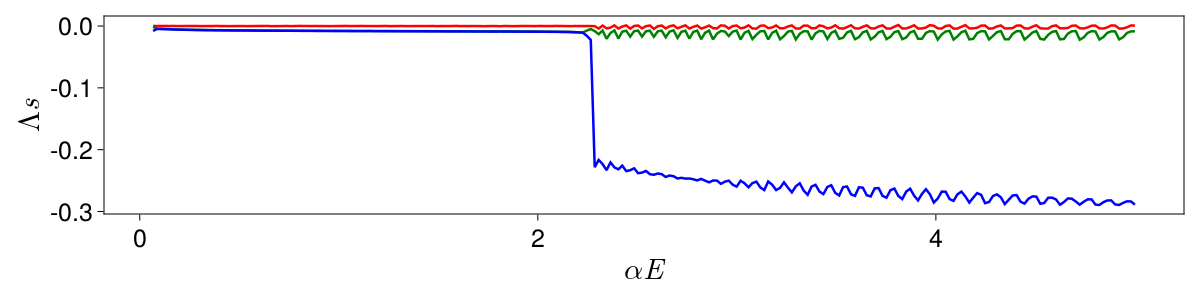

In [10]:
lb_size = 30; tck_size = 25;

f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"αE", ylabel = L"\Lambda s",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, αE_range, Λs[:, 1], linewidth = 2.5, color = :red)
lines!(axis, αE_range, Λs[:, 2], linewidth = 2.5, color = :green)
lines!(axis, αE_range, Λs[:, 3], linewidth = 2.5, color = :blue)
f